**Importacion bibliotecas**

In [1]:
# Bibliotecas básicas para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

# Para análisis estadístico
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Para análisis de series temporales
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from datetime import datetime, timedelta

# Para ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Para visualizaciones interactivas (opcional)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    plotly_available = True
except ImportError:
    plotly_available = False
    print("Plotly no está instalado. Las visualizaciones interactivas no estarán disponibles.")

# Para guardar modelos
import pickle
import joblib

# Para configurar la visualización de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Bibliotecas importadas correctamente para análisis exploratorio y modelado predictivo de goles por jugador.")

Bibliotecas importadas correctamente para análisis exploratorio y modelado predictivo de goles por jugador.


**Carga de datos**

In [2]:
# Definir la ruta del archivo
ruta_goleadores = "data/Goleadores_Unificados.csv"

# Cargar dataset con manejo de codificación
try:
    # Intentar cargar con codificación UTF-8
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
    print("Archivo cargado correctamente con codificación UTF-8.")
except UnicodeDecodeError:
    # Si falla, intentar con latin-1
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
    print("Archivo cargado correctamente con codificación latin-1.")

# Información básica sobre el dataset
print("\n--- INFORMACIÓN DEL DATASET DE GOLEADORES ---")
print(f"Número de filas: {df_goleadores.shape[0]}")
print(f"Número de columnas: {df_goleadores.shape[1]}")

# Mostrar las primeras filas del dataset
print("\n--- PRIMERAS FILAS DEL DATASET DE GOLEADORES ---")
display(df_goleadores.head(3))

# Información sobre los tipos de datos
print("\n--- TIPOS DE DATOS EN EL DATASET DE GOLEADORES ---")
display(df_goleadores.dtypes)

# Verificar valores nulos
print("\n--- VALORES NULOS EN EL DATASET DE GOLEADORES ---")
display(df_goleadores.isnull().sum())

Archivo cargado correctamente con codificación UTF-8.

--- INFORMACIÓN DEL DATASET DE GOLEADORES ---
Número de filas: 662
Número de columnas: 31

--- PRIMERAS FILAS DEL DATASET DE GOLEADORES ---


,Jugador,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Goles,Asistencias,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos
0,Carlos_Bacca,2022,2022-01-08,La Liga,Granada,Barcelona,D 1–1,0,0,1,Sat,Matchweek 20,Home,N,FW,7,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
1,Carlos_Bacca,2022,2022-01-20,La Liga,Granada,Getafe,L 2–4,0,0,2,Thu,Matchweek 21,Away,N,RM,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Carlos_Bacca,2022,2022-01-23,La Liga,Granada,Osasuna,L 0–2,0,0,3,Sun,Matchweek 22,Home,N,LW,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0



--- TIPOS DE DATOS EN EL DATASET DE GOLEADORES ---


Jugador               object
Temporada              int64
Fecha                 object
Competición           object
Equipo                object
Oponente              object
Resultado             object
Goles                  int64
Asistencias            int64
partido                int64
Día de la semana      object
Ronda o Fase          object
Sede                  object
Titular               object
Posición              object
Minutos                int64
Penales marcados       int64
Penales intentados     int64
Tiros totales          int64
Tiros a puerta         int64
Tarjetas amarillas     int64
Tarjetas rojas         int64
Faltas cometidas       int64
Faltas recibidas       int64
Fuera de juego         int64
Centros                int64
Entradas ganadas       int64
Intercepciones         int64
Goles en propia        int64
Penales ganados        int64
Penales concedidos     int64
dtype: object


--- VALORES NULOS EN EL DATASET DE GOLEADORES ---


Jugador                0
Temporada              0
Fecha                  0
Competición            0
Equipo                 0
Oponente               0
Resultado              0
Goles                  0
Asistencias            0
partido                0
Día de la semana       0
Ronda o Fase           0
Sede                   0
Titular                0
Posición              83
Minutos                0
Penales marcados       0
Penales intentados     0
Tiros totales          0
Tiros a puerta         0
Tarjetas amarillas     0
Tarjetas rojas         0
Faltas cometidas       0
Faltas recibidas       0
Fuera de juego         0
Centros                0
Entradas ganadas       0
Intercepciones         0
Goles en propia        0
Penales ganados        0
Penales concedidos     0
dtype: int64

**Limpieza de datos**

In [4]:
# Función para mostrar información resumida de un DataFrame
def mostrar_info_resumida(df, nombre):
    print(f"\n----- Resumen de {nombre} -----")
    print(f"Dimensiones: {df.shape}")
    print("\nColumnas únicas:")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"{col}: {df[col].nunique()} valores únicos")
    
    print("\nEstadísticas descriptivas para columnas numéricas:")
    display(df.describe())

# Limpieza del DataFrame de Goleadores
def limpiar_goleadores(df):
    df_limpio = df.copy()
    
    # Eliminar columnas específicas
    columnas_a_eliminar = ['Resultado', 'Ronda o fase', 'Posición', 'Partido']
    columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df_limpio.columns]
    if columnas_a_eliminar:
        df_limpio = df_limpio.drop(columns=columnas_a_eliminar)
        print(f"Columnas eliminadas: {columnas_a_eliminar}")
    
    # Convertir fechas a formato datetime
    if 'Fecha' in df_limpio.columns:
        df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
        
        # Crear columna de año y mes para facilitar análisis temporales
        df_limpio['Año'] = df_limpio['Fecha'].dt.year
        df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes
    if 'Equipo' in df_limpio.columns:
        df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    
    if 'Oponente' in df_limpio.columns:
        df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Crear columna de eficiencia ofensiva (goles / tiros totales)
    if 'Goles' in df_limpio.columns and 'Tiros totales' in df_limpio.columns:
        # Evitar división por cero
        df_limpio['Eficiencia_Ofensiva'] = np.where(
            df_limpio['Tiros totales'] > 0,
            df_limpio['Goles'] / df_limpio['Tiros totales'],
            0
        )
    
    return df_limpio

# Definir la ruta del archivo
ruta_goleadores = "data/Goleadores_Unificados.csv"

# Cargar dataset con manejo de codificación
try:
    # Intentar cargar con codificación UTF-8
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
    print("Archivo cargado correctamente con codificación UTF-8.")
except UnicodeDecodeError:
    # Si falla, intentar con latin-1
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
    print("Archivo cargado correctamente con codificación latin-1.")

# Aplicar limpieza al DataFrame
df_goleadores_limpio = limpiar_goleadores(df_goleadores)

# Mostrar información resumida del DataFrame limpio
mostrar_info_resumida(df_goleadores_limpio, "Goleadores limpio")

# Verificar que no queden valores nulos en columnas importantes
print("\n----- Verificación final de valores nulos -----")
print("\nValores nulos en DataFrame de Goleadores limpio:")
print(df_goleadores_limpio.isnull().sum()[df_goleadores_limpio.isnull().sum() > 0])

Archivo cargado correctamente con codificación UTF-8.
Columnas eliminadas: ['Resultado', 'Posición']

----- Resumen de Goleadores limpio -----
Dimensiones: (662, 32)

Columnas únicas:
Jugador: 5 valores únicos
Competición: 6 valores únicos
Equipo: 14 valores únicos
Oponente: 68 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 34 valores únicos
Sede: 2 valores únicos
Titular: 3 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Goles,Asistencias,partido,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos,Año,Mes,Eficiencia_Ofensiva
count,662.00,662,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00
mean,2023.25,2023-09-23 12:19:34.622356480,0.42,0.08,21.12,73.76,0.10,0.12,2.68,1.08,0.16,0.01,0.52,0.77,0.52,0.43,0.17,0.12,0.00,0.00,0.00,2023.25,6.27,0.14
min,2022.00,2022-01-08 00:00:00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,1.00,0.00
25%,2022.00,2022-12-04 18:00:00,0.00,0.00,10.00,67.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,3.00,0.00
50%,2023.00,2023-09-23 00:00:00,0.00,0.00,20.00,84.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023.00,6.00,0.00
75%,2024.00,2024-05-25 18:00:00,1.00,0.00,32.00,90.00,0.00,0.00,4.00,2.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2024.00,9.00,0.25
max,2025.00,2025-04-10 00:00:00,4.00,2.00,53.00,120.00,1.00,2.00,12.00,6.00,2.00,1.00,6.00,5.00,9.00,4.00,2.00,3.00,0.00,0.00,0.00,2025.00,12.00,1.00
std,0.92,NaN,0.64,0.29,13.27,23.50,0.30,0.33,1.98,1.11,0.37,0.09,0.80,0.98,0.86,0.75,0.43,0.37,0.00,0.00,0.00,0.92,3.33,0.24



----- Verificación final de valores nulos -----

Valores nulos en DataFrame de Goleadores limpio:
Series([], dtype: int64)


**Transformacion de los datos**

In [7]:
def crear_metricas_avanzadas_goleadores(df):
    """Crear métricas avanzadas para goleadores incluyendo variables dummy para oponentes colombianos y sede"""
    df_transformado = df.copy()
    
    # Aplicar mapeo de equipos colombianos y crear dummies para oponentes y equipos
    df_transformado = aplicar_mapeo_equipos(df_transformado)
    
    # Crear variable dummy para sede (local/visitante)
    df_transformado = crear_dummy_sede(df_transformado)
    
    # Goles por 90 minutos
    if 'Goles' in df_transformado.columns and 'Minutos' in df_transformado.columns:
        df_transformado['Goles_por_90min'] = df_transformado['Goles'] / (df_transformado['Minutos'] / 90)
        # Corregir infinitos o NaN
        df_transformado['Goles_por_90min'] = df_transformado['Goles_por_90min'].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Eficiencia de tiro (porcentaje de tiros que son gol)
    if 'Goles' in df_transformado.columns and 'Tiros totales' in df_transformado.columns:
        df_transformado['Eficiencia_Tiro'] = np.where(
            df_transformado['Tiros totales'] > 0,
            df_transformado['Goles'] / df_transformado['Tiros totales'] * 100,
            0
        )
    
    # Precisión de tiro (porcentaje de tiros que van a puerta)
    if 'Tiros a puerta' in df_transformado.columns and 'Tiros totales' in df_transformado.columns:
        df_transformado['Precision_Tiro'] = np.where(
            df_transformado['Tiros totales'] > 0,
            df_transformado['Tiros a puerta'] / df_transformado['Tiros totales'] * 100,
            0
        )
    
    # Índice de contribución ofensiva
    if all(col in df_transformado.columns for col in ['Asistencias', 'Penales ganados', 'Tiros a puerta']):
        df_transformado['Indice_Ofensivo'] = (
            df_transformado['Asistencias'] * 2 + 
            df_transformado['Penales ganados'] * 1 +
            df_transformado['Tiros a puerta'] * 0.2
        )
    
    # Índice de disciplina
    if all(col in df_transformado.columns for col in ['Tarjetas amarillas', 'Tarjetas rojas']):
        df_transformado['Indice_Disciplina'] = 10 - (
            df_transformado['Tarjetas amarillas'] * 1 + 
            df_transformado['Tarjetas rojas'] * 3
        )
        df_transformado['Indice_Disciplina'] = df_transformado['Indice_Disciplina'].clip(lower=0)
    
    # Índice de participación en juego
    if 'Minutos' in df_transformado.columns:
        df_transformado['Indice_Participacion'] = df_transformado['Minutos'] / 90 * 10
    
    # Score global de ataque
    if all(col in df_transformado.columns for col in ['Indice_Ofensivo', 'Indice_Disciplina', 'Indice_Participacion']):
        df_transformado['Score_Global_Ataque'] = (
            df_transformado['Indice_Ofensivo'] * 0.6 + 
            df_transformado['Indice_Disciplina'] * 0.1 + 
            df_transformado['Indice_Participacion'] * 0.3
        )
    
    # Tasa de conversión de penales
    if 'Penales marcados' in df_transformado.columns and 'Penales intentados' in df_transformado.columns:
        df_transformado['Tasa_Conversion_Penales'] = np.where(
            df_transformado['Penales intentados'] > 0,
            df_transformado['Penales marcados'] / df_transformado['Penales intentados'] * 100,
            0
        )
    
    # Ratio de faltas (recibidas/cometidas)
    if 'Faltas recibidas' in df_transformado.columns and 'Faltas cometidas' in df_transformado.columns:
        df_transformado['Ratio_Faltas'] = np.where(
            df_transformado['Faltas cometidas'] > 0,
            df_transformado['Faltas recibidas'] / df_transformado['Faltas cometidas'],
            df_transformado['Faltas recibidas']  # Si no hay faltas cometidas, usar faltas recibidas
        )
    
    return df_transformado

def crear_dummy_sede(df):
    """
    Crea variables dummy para local/visitante basadas en la columna 'Sede'
    """
    # Verificar si la columna 'Sede' existe
    if 'Sede' not in df.columns:
        print("Advertencia: Columna 'Sede' no encontrada, no se pueden crear variables dummy de local/visitante")
        return df
    
    # Estandarizar valores de Sede (convertir a mayúsculas)
    df['Sede'] = df['Sede'].str.upper()
    
    # Crear variables dummy para Home (Local) y Away (Visitante)
    df['Sede_Local'] = 0
    df['Sede_Visitante'] = 0
    
    # Mapear diferentes formas de indicar local/visitante
    locales = ['HOME', 'H', 'LOCAL', 'L', 'LOC']
    visitantes = ['AWAY', 'A', 'VISITANTE', 'V', 'VIS']
    
    for valor in locales:
        df.loc[df['Sede'] == valor, 'Sede_Local'] = 1
    
    for valor in visitantes:
        df.loc[df['Sede'] == valor, 'Sede_Visitante'] = 1
    
    # Para valores que no están en ninguna de las listas, intentar inferir
    sin_mapeo = (df['Sede_Local'] == 0) & (df['Sede_Visitante'] == 0)
    
    if sin_mapeo.sum() > 0:
        print(f"Advertencia: {sin_mapeo.sum()} registros con valores de sede no reconocidos")
        print("Valores no reconocidos:", df.loc[sin_mapeo, 'Sede'].unique())
        
        # Intentar mapear por contenido parcial
        for idx in df[sin_mapeo].index:
            sede = df.loc[idx, 'Sede']
            if any(local in sede for local in ['HOME', 'LOCAL', 'H ']):
                df.loc[idx, 'Sede_Local'] = 1
            elif any(visitante in sede for visitante in ['AWAY', 'VISIT', 'A ']):
                df.loc[idx, 'Sede_Visitante'] = 1
    
    # Verificar si hay registros sin clasificar después de la inferencia
    sin_clasificar = (df['Sede_Local'] == 0) & (df['Sede_Visitante'] == 0)
    if sin_clasificar.sum() > 0:
        print(f"Advertencia: {sin_clasificar.sum()} registros sin clasificar como local o visitante")
        
        # Asignar un valor predeterminado a registros sin clasificar
        df.loc[sin_clasificar, 'Sede_Neutral'] = 1
    else:
        df['Sede_Neutral'] = 0
    
    return df

def aplicar_mapeo_equipos(df):
    """
    Aplica el mapeo de nombres de equipos colombianos y crea variables dummy
    para los oponentes y equipos colombianos.
    """
    df_procesado = df.copy()
    
    # Verificar si las columnas necesarias existen
    columnas_necesarias = ['Equipo', 'Oponente']
    columnas_faltantes = [col for col in columnas_necesarias if col not in df_procesado.columns]
    
    if columnas_faltantes:
        print(f"Advertencia: Columnas faltantes: {columnas_faltantes}. No se puede aplicar mapeo completo.")
        return df_procesado
    
    # Diccionario de mapeo para estandarizar nombres de equipos colombianos
    mapeo_equipos = {
        # Equipos colombianos
        "JUNIOR": "Junior",
        "JR FC": "Junior",
        "ATLÉTICO JUNIOR": "Junior",
        "ATLETICO JUNIOR": "Junior",
        
        "CD AMÉRICA": "América de Cali",
        "CD AMERICA": "América de Cali",
        
        "MILLONARIOS": "Millonarios",
        "co MILLONARIOS": "Millonarios",
        
        "NACIONAL": "Atlético Nacional",
        
        "SANTA FE": "Independiente Santa Fe",
        "co SANTA FE": "Independiente Santa Fe",
        
        "TOLIMA": "Deportes Tolima",
        "co TOLIMA": "Deportes Tolima",
        
        "INDEPENDIENTE": "Independiente Medellín",
        
        "AD CALI": "Deportivo Cali",
        
        "PASTO": "Deportivo Pasto",
        
        "ONCE CALDAS": "Once Caldas",
        "co ONCE CALDAS": "Once Caldas",
        
        "ALIANZA": "Alianza FC",
        
        "PEREIRA": "Pereira",
        "DEPORTIVO PEREIRA": "Pereira",
        
        "CA BUCARAMANGA": "Bucaramanga",
        "ATLETICO BUCARAMANGA": "Bucaramanga",
        "ATLÉTICO BUCARAMANGA": "Bucaramanga",
        
        "BOYACÁ CHICÓ": "Boyacá Chicó",
        "BOYACA CHICO": "Boyacá Chicó",
        "BOYACÁ PATRIOT": "Boyacá Chicó",
        "BOYACA PATRIOT": "Boyacá Chicó",
        
        "ENVIGADO": "Envigado",
        
        "FORTALEZA FC": "Fortaleza CEIF",
        
        "RIONEGRO": "Rionegro",
        "ÁGUILAS DORADAS": "Rionegro",
        "AGUILAS DORADAS": "Rionegro",
        
        "LA EQUIDAD": "La Equidad",
        
        "UNIÓN MAGDALENA": "Unión Magdalena",
        "UNION MAGDALENA": "Unión Magdalena",
        
        "JAGUARES": "Jaguares",
        
        "CORTULUÁ": "Cortuluá",
        "CORTULUA": "Cortuluá",
        
        "ATLÉTICO HUILA": "Atlético Huila",
        "ATLETICO HUILA": "Atlético Huila",
        
        "LLANEROS": "Llaneros"
    }
    
    # Lista completa de equipos colombianos
    equipos_colombianos = [
        "Junior", "América de Cali", "Millonarios", "Atlético Nacional", 
        "Independiente Santa Fe", "Deportes Tolima", "Independiente Medellín", 
        "Deportivo Cali", "Deportivo Pasto", "Once Caldas", "Alianza FC", 
        "Pereira", "Llaneros", "Bucaramanga", "Boyacá Chicó", 
        "Envigado", "Fortaleza CEIF", "Rionegro", "La Equidad", 
        "Unión Magdalena", "Jaguares", "Cortuluá", "Atlético Huila"
    ]
    
    # Procesar tanto Equipo como Oponente
    for campo in ['Equipo', 'Oponente']:
        # Aplicar mapeo directo
        df_procesado[f'{campo}_Estandarizado'] = df_procesado[campo].map(mapeo_equipos)
        
        # Para los que no se han mapeado directamente, intentar coincidencias parciales
        sin_mapeo = df_procesado[f'{campo}_Estandarizado'].isna()
        
        # Marcar cuáles son equipos colombianos
        df_procesado[f'{campo}_Es_Colombiano'] = False
        
        # Primero, detectar equipos internacionales por prefijos de país
        prefijos_paises = ['ar ', 'br ', 'cl ', 'co ', 'ec ', 'pe ', 'uy ', 'bo ']
        for prefijo in prefijos_paises:
            df_procesado.loc[df_procesado[campo].str.lower().str.startswith(prefijo), f'{campo}_Es_Internacional'] = True
            # Eliminar prefijo para equipos colombianos
            if prefijo == 'co ':
                mascara = df_procesado[campo].str.lower().str.startswith(prefijo)
                df_procesado.loc[mascara, campo] = df_procesado.loc[mascara, campo].str[3:]
        
        # Intentar mapear por coincidencias parciales
        for idx in df_procesado[sin_mapeo].index:
            valor = df_procesado.loc[idx, campo]
            
            # Saltar equipos claramente internacionales
            es_internacional = False
            for prefijo in prefijos_paises:
                if valor.lower().startswith(prefijo):
                    es_internacional = True
                    break
            
            if es_internacional:
                continue
                
            # Buscar coincidencias con equipos colombianos
            for equipo in equipos_colombianos:
                equipo_simple = equipo.upper().replace(" FC", "").replace("DEPORTIVO", "").replace("DEPORTES", "").replace("ATLÉTICO", "").replace("ATLETICO", "").strip()
                valor_simple = valor.upper().replace(" FC", "").replace("DEPORTIVO", "").replace("DEPORTES", "").replace("ATLÉTICO", "").replace("ATLETICO", "").strip()
                
                if equipo_simple in valor_simple or valor_simple in equipo_simple:
                    df_procesado.loc[idx, f'{campo}_Estandarizado'] = equipo
                    df_procesado.loc[idx, f'{campo}_Es_Colombiano'] = True
                    break
        
        # Para los valores que siguen sin mapeo, mantener el nombre original
        df_procesado.loc[df_procesado[f'{campo}_Estandarizado'].isna(), f'{campo}_Estandarizado'] = df_procesado.loc[df_procesado[f'{campo}_Estandarizado'].isna(), campo]
        
        # Marcar todos los equipos que se han mapeado a equipos colombianos
        for equipo in equipos_colombianos:
            df_procesado.loc[df_procesado[f'{campo}_Estandarizado'] == equipo, f'{campo}_Es_Colombiano'] = True
        
        # Crear variables dummy solo para oponentes/equipos colombianos
        # Filtrar primero las filas con valores colombianos
        df_colombianos = df_procesado[df_procesado[f'{campo}_Es_Colombiano']].copy()
        
        if len(df_colombianos) > 0:
            # Crear dummies solo para equipos colombianos
            dummies = pd.get_dummies(df_colombianos[f'{campo}_Estandarizado'], prefix=campo)
            
            # Añadir dummies al DataFrame original
            df_procesado = pd.merge(
                df_procesado.drop(columns=[col for col in df_procesado.columns if col.startswith(f'{campo}_') and col not in [f'{campo}_Original', f'{campo}_Estandarizado', f'{campo}_Es_Colombiano']]),
                dummies,
                left_index=True,
                right_index=True,
                how='left'
            )
            
            # Rellenar NAs en columnas dummy con 0
            for col in dummies.columns:
                if col in df_procesado.columns:
                    df_procesado[col] = df_procesado[col].fillna(0)
    
    return df_procesado

def procesar_goleadores():
    # Definir la ruta del archivo
    ruta_goleadores = "data/Goleadores_Unificados.csv"
    
    # Cargar dataset con manejo de codificación
    try:
        # Intentar cargar con codificación UTF-8
        df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
        print("Archivo cargado correctamente con codificación UTF-8.")
    except UnicodeDecodeError:
        # Si falla, intentar con latin-1
        df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
        print("Archivo cargado correctamente con codificación latin-1.")
        
    # Eliminar columnas no necesarias
    columnas_a_eliminar = ['Resultado', 'Ronda o Fase', 'Posición', 'Partido', 'partido', 'Competición']
    columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df_goleadores.columns]
    if columnas_a_eliminar:
        df_goleadores = df_goleadores.drop(columns=columnas_a_eliminar)
        print(f"Columnas eliminadas: {columnas_a_eliminar}")
    
    # Convertir fechas a formato datetime
    if 'Fecha' in df_goleadores.columns:
        df_goleadores['Fecha'] = pd.to_datetime(df_goleadores['Fecha'], errors='coerce')
        
        # Crear columna de año y mes para facilitar análisis temporales
        df_goleadores['Año'] = df_goleadores['Fecha'].dt.year
        df_goleadores['Mes'] = df_goleadores['Fecha'].dt.month
    
    # Crear métricas avanzadas para goleadores
    df_goleadores_procesado = crear_metricas_avanzadas_goleadores(df_goleadores)
    
    # Mostrar las nuevas métricas creadas
    print("\n----- Nuevas métricas para Goleadores -----")
    cols_nuevas_goleadores = ['Goles_por_90min', 'Eficiencia_Tiro', 
                             'Precision_Tiro', 'Indice_Ofensivo', 'Score_Global_Ataque',
                             'Tasa_Conversion_Penales', 'Ratio_Faltas']
    cols_presentes = [col for col in cols_nuevas_goleadores if col in df_goleadores_procesado.columns]
    
    if cols_presentes:
        print("\nEstadísticas de nuevas métricas:")
        display(df_goleadores_procesado[cols_presentes].describe())
    
    # Verificar variables dummy generadas para oponentes
    oponentes_cols = [col for col in df_goleadores_procesado.columns if col.startswith('Oponente_') and col not in ['Oponente_Estandarizado', 'Oponente_Es_Colombiano']]
    print(f"\nTotal de variables dummy de oponentes colombianos: {len(oponentes_cols)}")
    if oponentes_cols:
        print(f"Ejemplos de variables dummy de oponentes: {oponentes_cols[:5]}")
    
    # Verificar variables dummy generadas para equipos
    equipos_cols = [col for col in df_goleadores_procesado.columns if col.startswith('Equipo_') and col not in ['Equipo_Estandarizado', 'Equipo_Es_Colombiano']]
    print(f"\nTotal de variables dummy de equipos colombianos: {len(equipos_cols)}")
    if equipos_cols:
        print(f"Ejemplos de variables dummy de equipos: {equipos_cols[:5]}")
    
    # Verificar variables dummy generadas para sede
    sede_cols = [col for col in df_goleadores_procesado.columns if col.startswith('Sede_')]
    print(f"\nVariables dummy de sede (local/visitante): {sede_cols}")
    print(f"Distribución de partidos por sede:")
    for col in sede_cols:
        if col in df_goleadores_procesado.columns:
            print(f"  {col}: {df_goleadores_procesado[col].sum()} partidos")
    
    # Guardar el dataset transformado
    ruta_salida = "Goleadores_Procesados.csv"
    df_goleadores_procesado.to_csv(ruta_salida, index=False)
    print(f"\nEl dataset de goleadores transformado ha sido guardado como: {ruta_salida}")
    
    return df_goleadores_procesado

# Ejecutar el procesamiento
df_goleadores_final = procesar_goleadores()

Archivo cargado correctamente con codificación UTF-8.
Columnas eliminadas: ['Resultado', 'Ronda o Fase', 'Posición', 'partido', 'Competición']

----- Nuevas métricas para Goleadores -----

Estadísticas de nuevas métricas:


,Goles_por_90min,Eficiencia_Tiro,Precision_Tiro,Indice_Ofensivo,Score_Global_Ataque,Tasa_Conversion_Penales,Ratio_Faltas
count,662.00,662.00,662.00,662.00,662.00,662.00,662.00
mean,0.49,14.41,35.34,0.37,3.66,10.05,0.70
std,0.81,24.12,34.58,0.62,0.94,30.02,0.91
min,0.00,0.00,0.00,0.00,1.03,0.00,0.00
25%,0.00,0.00,0.00,0.00,3.39,0.00,0.00
50%,0.00,0.00,33.33,0.20,3.99,0.00,0.00
75%,1.00,25.00,50.00,0.40,4.12,0.00,1.00
max,9.00,100.00,100.00,4.40,6.52,100.00,5.00



Total de variables dummy de oponentes colombianos: 21
Ejemplos de variables dummy de oponentes: ['Oponente_Alianza FC', 'Oponente_Atlético Huila', 'Oponente_Atlético Nacional', 'Oponente_Boyacá Chicó', 'Oponente_Bucaramanga']

Total de variables dummy de equipos colombianos: 7
Ejemplos de variables dummy de equipos: ['Equipo_Bucaramanga', 'Equipo_Independiente Santa Fe', 'Equipo_Junior', 'Equipo_Millonarios', 'Equipo_Once Caldas']

Variables dummy de sede (local/visitante): ['Sede_Local', 'Sede_Visitante', 'Sede_Neutral']
Distribución de partidos por sede:
  Sede_Local: 349 partidos
  Sede_Visitante: 313 partidos
  Sede_Neutral: 0 partidos

El dataset de goleadores transformado ha sido guardado como: Goleadores_Procesados.csv


**Analisis exploratorio de datos**

Dimensiones del dataset: 662 filas, 72 columnas
Número de jugadores únicos: 5

Distribución de variables principales para análisis de goles:
       Goles  Goles_por_90min  Eficiencia_Tiro  Precision_Tiro  Indice_Ofensivo  Score_Global_Ataque
count 662.00           662.00           662.00          662.00           662.00               662.00
mean    0.42             0.49            14.41           35.34             0.37                 3.66
std     0.64             0.81            24.12           34.58             0.62                 0.94
min     0.00             0.00             0.00            0.00             0.00                 1.03
25%     0.00             0.00             0.00            0.00             0.00                 3.39
50%     0.00             0.00             0.00           33.33             0.20                 3.99
75%     1.00             1.00            25.00           50.00             0.40                 4.12
max     4.00             9.00           100.00     

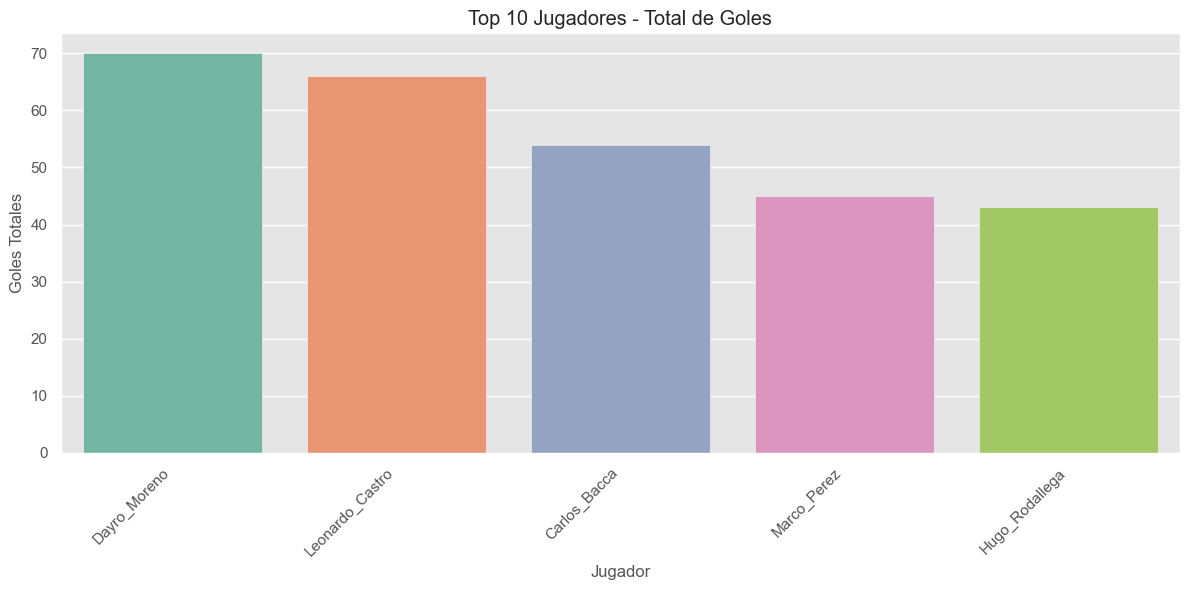

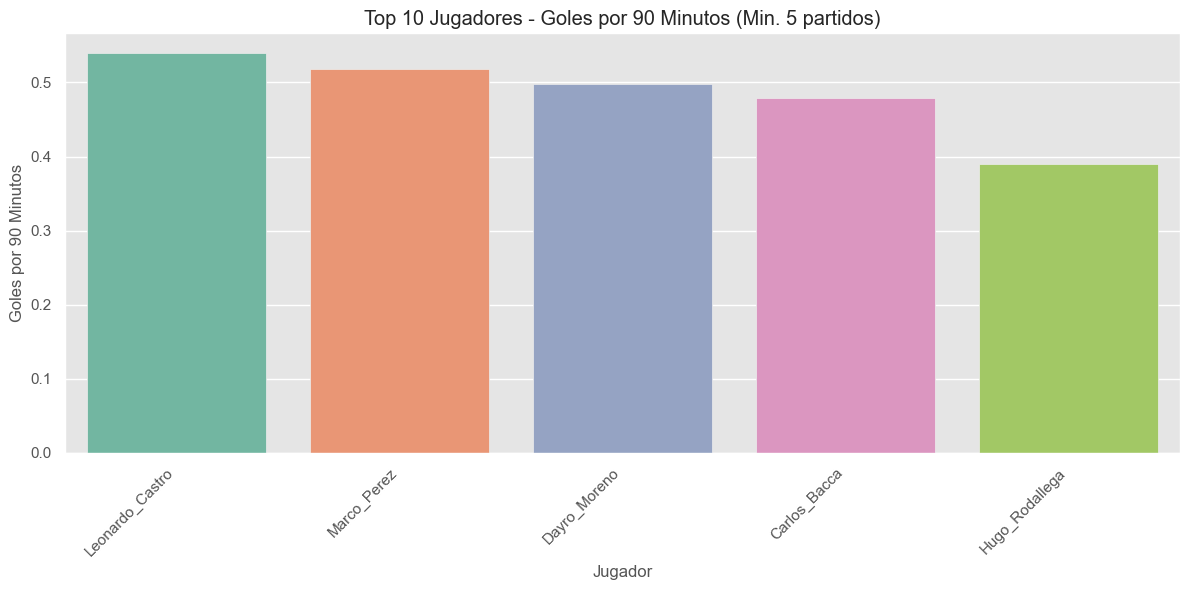

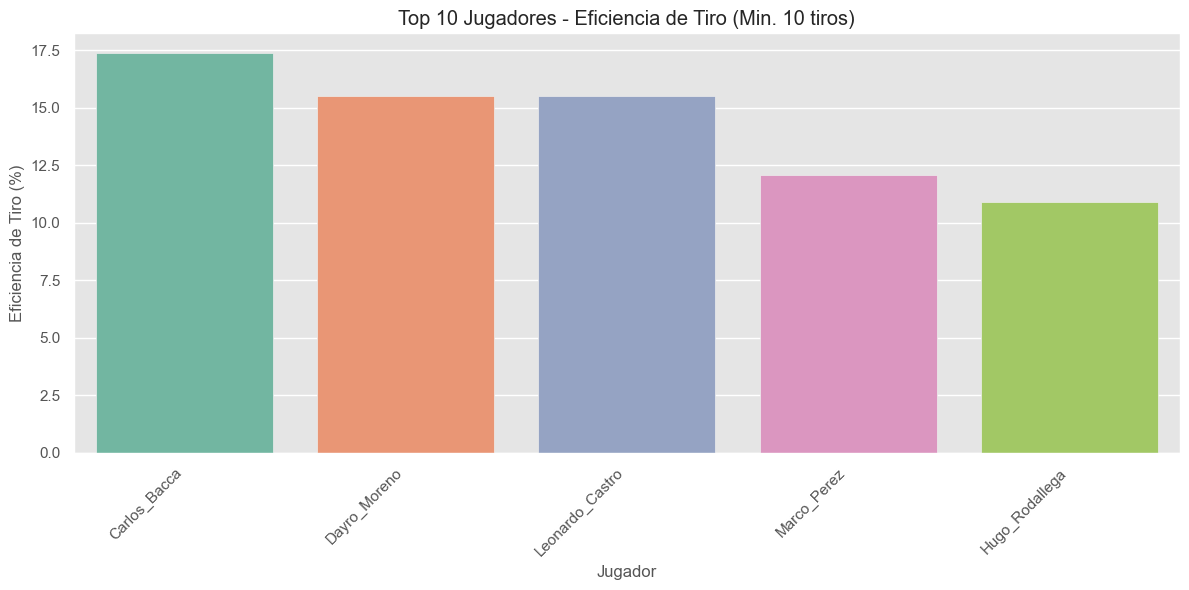

Evolución de goles por temporada para top 5 goleadores:
Temporada        2022  2023  2024  2025
Jugador                                
Carlos_Bacca        9    18    24     3
Dayro_Moreno       22    20    21     7
Hugo_Rodallega      1    15    18     9
Leonardo_Castro    24    15    21     6
Marco_Perez        14    28     3     0


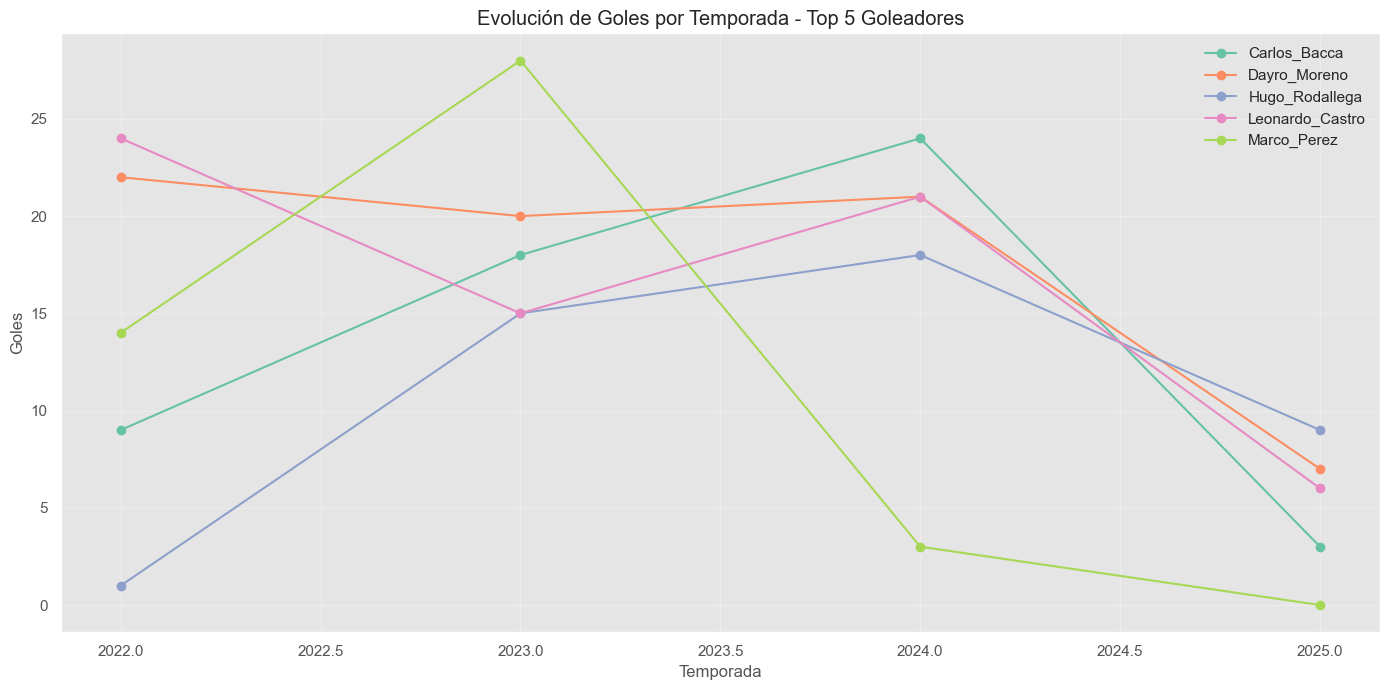


Evolución de eficiencia de tiro por temporada para top 5 goleadores:
Temporada        2022  2023  2024  2025
Jugador                                
Carlos_Bacca    19.67 14.75 18.68 16.67
Dayro_Moreno    15.24 19.83 11.82 16.89
Hugo_Rodallega   4.35 13.06  8.94 22.00
Leonardo_Castro 17.45  9.53 17.59 25.76
Marco_Perez     10.32 17.99  6.31  0.00


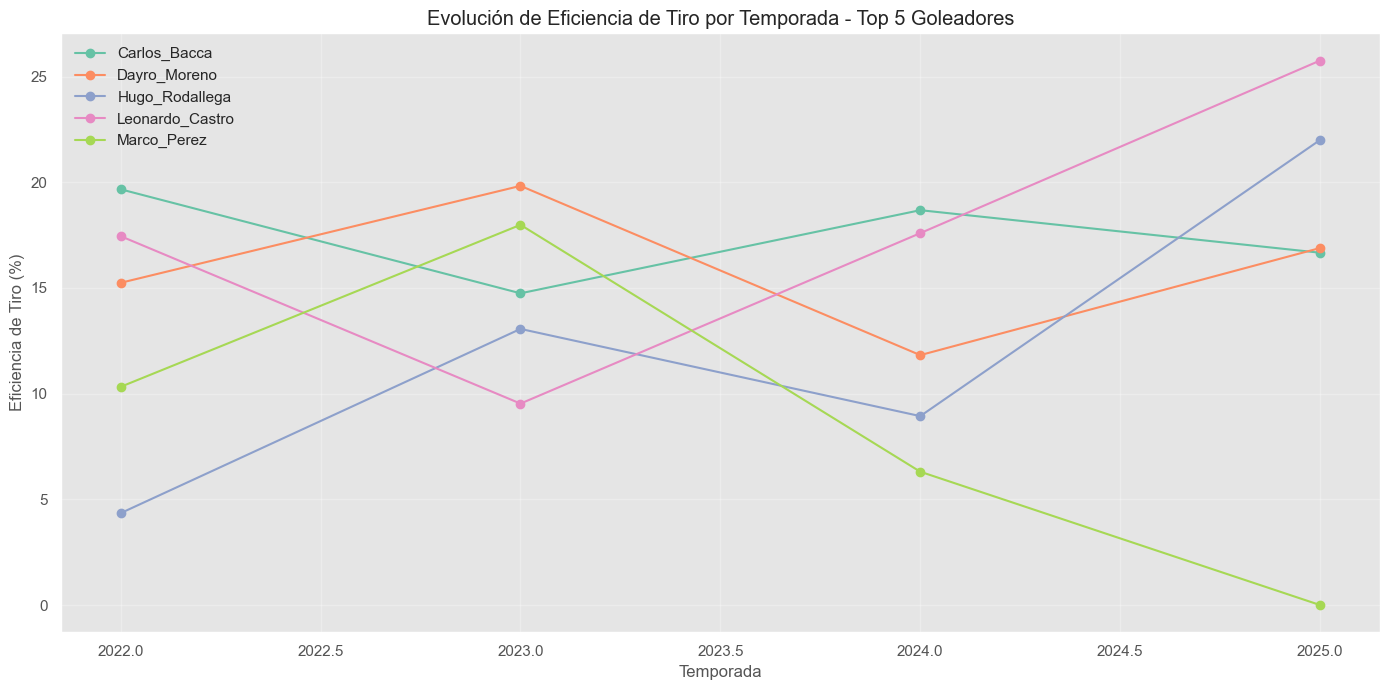

Goles como local vs visitante para top 5 goleadores:
                 Goles_Local  Goles_Visitante  Diferencia
Jugador                                                  
Dayro_Moreno            0.55             0.41        0.14
Leonardo_Castro         0.45             0.51       -0.06
Carlos_Bacca            0.51             0.27        0.23
Marco_Perez             0.40             0.34        0.06
Hugo_Rodallega          0.40             0.31        0.09


<Figure size 1400x700 with 0 Axes>

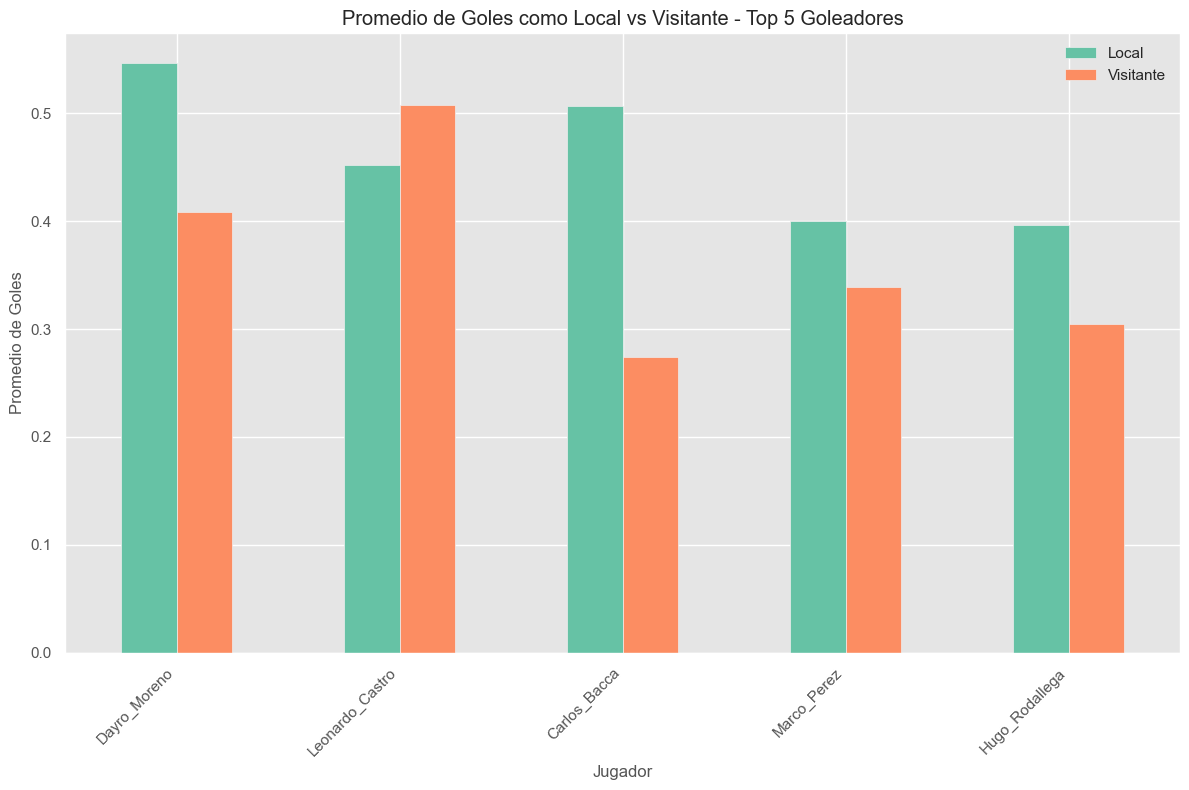


Relación entre minutos jugados y goles anotados:
Dayro_Moreno: Correlación Minutos-Goles = 0.1365
Leonardo_Castro: Correlación Minutos-Goles = 0.1166
Carlos_Bacca: Correlación Minutos-Goles = 0.3388
Marco_Perez: Correlación Minutos-Goles = 0.3062
Hugo_Rodallega: Correlación Minutos-Goles = 0.2296

Correlaciones promedio con goles para todos los jugadores (con al menos 5 partidos):
              Variable  Correlación_Promedio
0      Eficiencia_Tiro                  0.79
0       Tiros a puerta                  0.63
0       Precision_Tiro                  0.49
0        Tiros totales                  0.40
0  Score_Global_Ataque                  0.29
0      Indice_Ofensivo                  0.24
0              Minutos                  0.23
0          Asistencias                  0.01


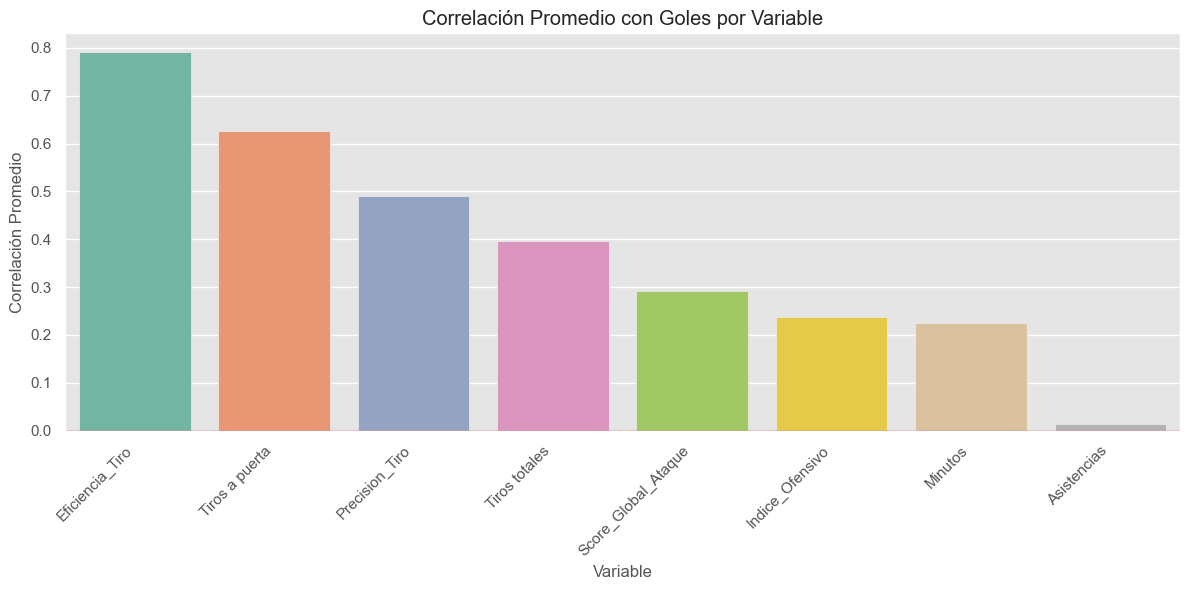

Matriz de correlación completa entre variables numéricas:


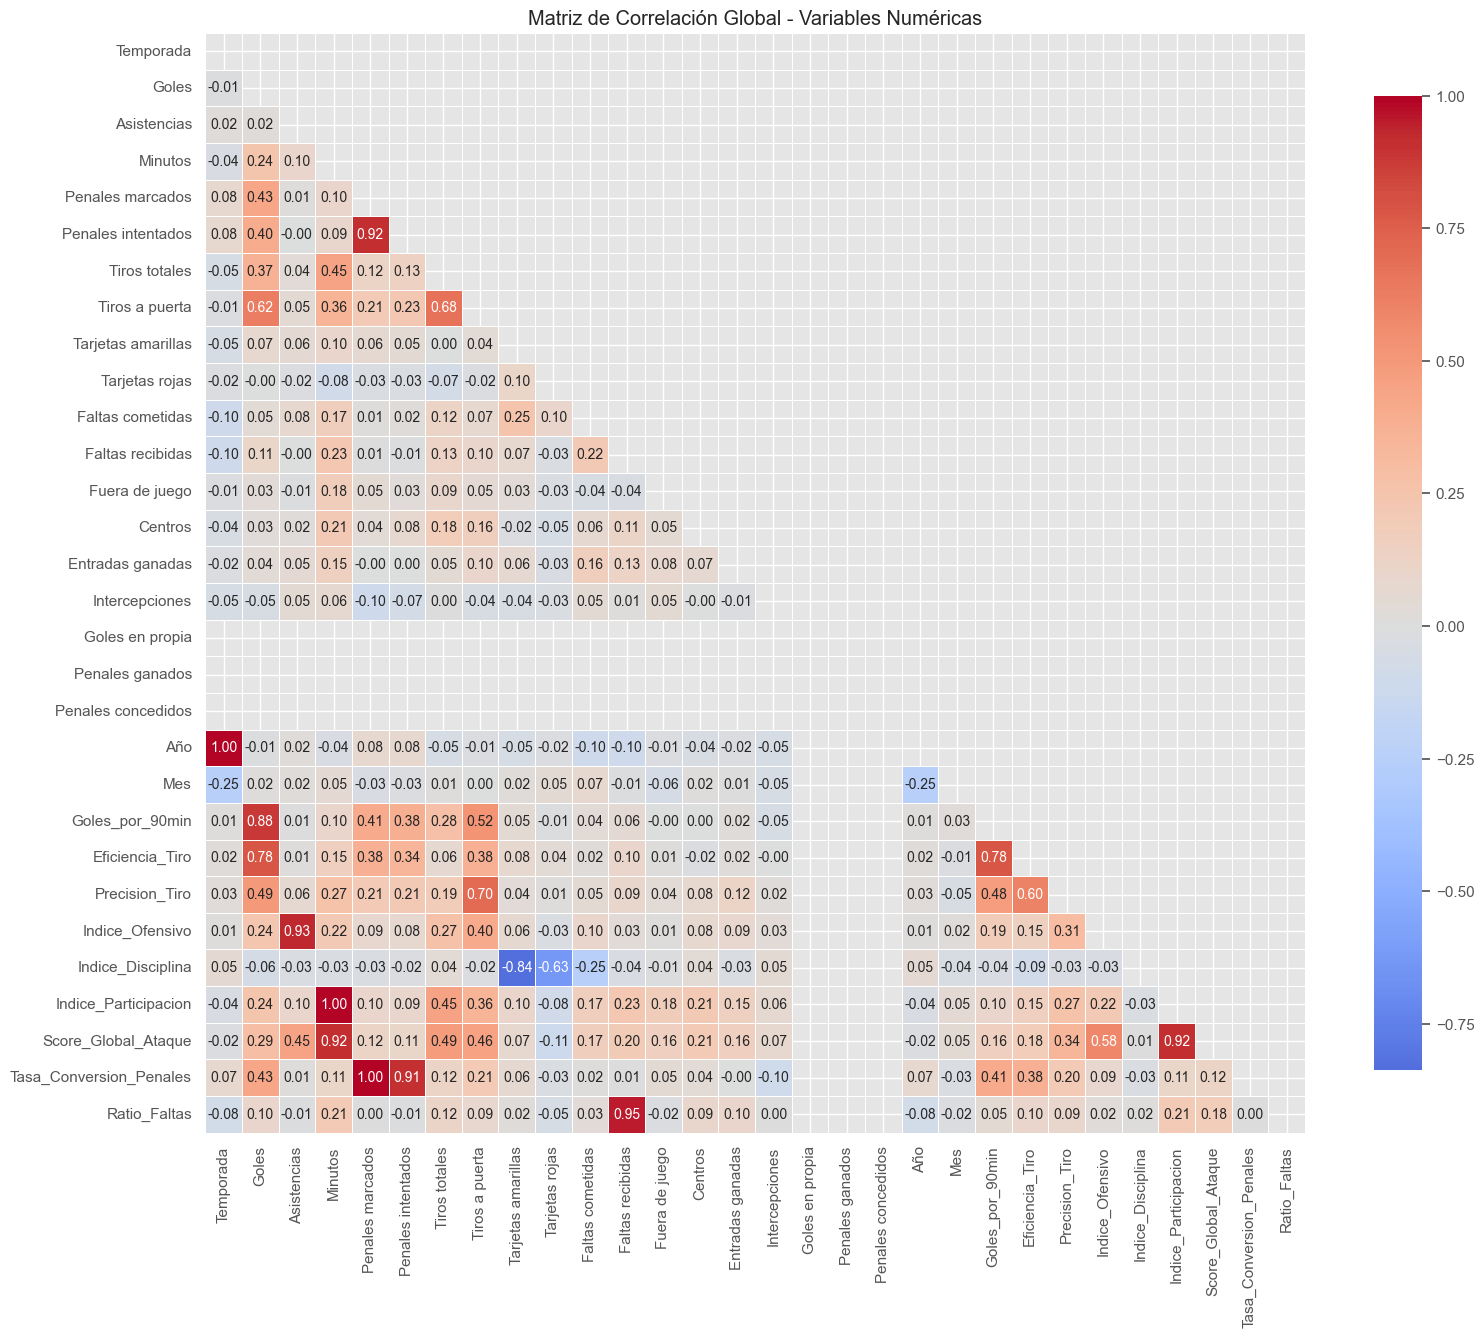


Variables más correlacionadas con 'Goles':
Goles                      1.00
Goles_por_90min            0.88
Eficiencia_Tiro            0.78
Tiros a puerta             0.62
Precision_Tiro             0.49
Tasa_Conversion_Penales    0.43
Penales marcados           0.43
Penales intentados         0.40
Tiros totales              0.37
Score_Global_Ataque        0.29
Minutos                    0.24
Indice_Participacion       0.24
Indice_Ofensivo            0.24
Faltas recibidas           0.11
Ratio_Faltas               0.10
Tarjetas amarillas         0.07
Faltas cometidas           0.05
Entradas ganadas           0.04
Fuera de juego             0.03
Centros                    0.03
Asistencias                0.02
Mes                        0.02
Tarjetas rojas            -0.00
Temporada                 -0.01
Año                       -0.01
Intercepciones            -0.05
Indice_Disciplina         -0.06
Goles en propia             NaN
Penales ganados             NaN
Penales concedidos          

In [17]:

# 1. Carga y exploración inicial de datos

# Carga de datos
ruta_archivo = "Goleadores_Procesados.csv"
df = pd.read_csv(ruta_archivo)

# Convertir fecha a datetime si es necesario
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Información básica
print(f"Dimensiones del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Número de jugadores únicos: {df['Jugador'].nunique()}")
print("\nDistribución de variables principales para análisis de goles:")
print(df[['Goles', 'Goles_por_90min', 'Eficiencia_Tiro', 'Precision_Tiro', 
          'Indice_Ofensivo', 'Score_Global_Ataque']].describe())

# 2. Análisis de mejores goleadores

# Top goleadores totales
print("Top 10 jugadores con más goles totales:")
top_goleadores = df.groupby('Jugador')['Goles'].sum().sort_values(ascending=False).head(10)
print(top_goleadores)

# Jugadores con mejor promedio de goles por 90 minutos (mínimo 5 partidos)
min_partidos = 5
if 'partido' in df.columns:
    jugadores_min_partidos = df.groupby('Jugador')['partido'].count() >= min_partidos
else:
    jugadores_min_partidos = df.groupby('Jugador').size() >= min_partidos

print(f"\nTop 10 jugadores con mejor promedio de goles por 90 minutos (mínimo {min_partidos} partidos):")
top_promedio = df.groupby('Jugador')['Goles_por_90min'].mean()
top_promedio = top_promedio[jugadores_min_partidos].sort_values(ascending=False).head(10)
print(top_promedio)

# Jugadores con mejor eficiencia de tiro (mínimo 10 tiros totales)
min_tiros = 10
jugadores_min_tiros = df.groupby('Jugador')['Tiros totales'].sum() >= min_tiros
print(f"\nTop 10 jugadores con mejor eficiencia de tiro (mínimo {min_tiros} tiros):")
top_eficiencia = df.groupby('Jugador')['Eficiencia_Tiro'].mean()
top_eficiencia = top_eficiencia[jugadores_min_tiros].sort_values(ascending=False).head(10)
print(top_eficiencia)

# Visualización: Top goleadores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_goleadores.index, y=top_goleadores.values)
plt.title('Top 10 Jugadores - Total de Goles')
plt.xlabel('Jugador')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización: Top promedio goles por 90min
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_promedio.index, y=top_promedio.values)
plt.title(f'Top 10 Jugadores - Goles por 90 Minutos (Min. {min_partidos} partidos)')
plt.xlabel('Jugador')
plt.ylabel('Goles por 90 Minutos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización: Top eficiencia de tiro
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_eficiencia.index, y=top_eficiencia.values)
plt.title(f'Top 10 Jugadores - Eficiencia de Tiro (Min. {min_tiros} tiros)')
plt.xlabel('Jugador')
plt.ylabel('Eficiencia de Tiro (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Evolución temporal de jugadores destacados

# Seleccionar top 5 goleadores para análisis temporal
top5_goleadores = top_goleadores.index[:5].tolist()

# Evolución por temporada (si hay varias temporadas)
if df['Temporada'].nunique() > 1:
    print("Evolución de goles por temporada para top 5 goleadores:")
    evolucion_temporada = df[df['Jugador'].isin(top5_goleadores)].groupby(['Jugador', 'Temporada'])['Goles'].sum().unstack()
    print(evolucion_temporada)
    
    # Visualización: Evolución temporal
    plt.figure(figsize=(14, 7))
    for jugador in evolucion_temporada.index:
        plt.plot(evolucion_temporada.columns, evolucion_temporada.loc[jugador], marker='o', label=jugador)
    plt.title('Evolución de Goles por Temporada - Top 5 Goleadores')
    plt.xlabel('Temporada')
    plt.ylabel('Goles')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Evolución de eficiencia por temporada
if df['Temporada'].nunique() > 1:
    print("\nEvolución de eficiencia de tiro por temporada para top 5 goleadores:")
    eficiencia_temporada = df[df['Jugador'].isin(top5_goleadores)].groupby(['Jugador', 'Temporada'])['Eficiencia_Tiro'].mean().unstack()
    print(eficiencia_temporada)
    
    # Visualización: Evolución de eficiencia
    plt.figure(figsize=(14, 7))
    for jugador in eficiencia_temporada.index:
        plt.plot(eficiencia_temporada.columns, eficiencia_temporada.loc[jugador], marker='o', label=jugador)
    plt.title('Evolución de Eficiencia de Tiro por Temporada - Top 5 Goleadores')
    plt.xlabel('Temporada')
    plt.ylabel('Eficiencia de Tiro (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 4. Factores que influyen en el rendimiento individual

# Comparación de goles como local vs visitante para los mejores goleadores
print("Goles como local vs visitante para top 5 goleadores:")
if 'Sede_Local' in df.columns and 'Sede_Visitante' in df.columns:
    goles_sede = pd.DataFrame()
    for jugador in top5_goleadores:
        jugador_df = df[df['Jugador'] == jugador]
        goles_local = jugador_df[jugador_df['Sede_Local'] == 1]['Goles'].mean()
        goles_visit = jugador_df[jugador_df['Sede_Visitante'] == 1]['Goles'].mean()
        goles_sede = pd.concat([goles_sede, pd.DataFrame({
            'Jugador': [jugador],
            'Goles_Local': [goles_local],
            'Goles_Visitante': [goles_visit],
            'Diferencia': [goles_local - goles_visit]
        })])
    print(goles_sede.set_index('Jugador'))
    
    # Visualización: Comparativa local vs visitante
    plt.figure(figsize=(14, 7))
    goles_sede.set_index('Jugador')[['Goles_Local', 'Goles_Visitante']].plot(kind='bar')
    plt.title('Promedio de Goles como Local vs Visitante - Top 5 Goleadores')
    plt.xlabel('Jugador')
    plt.ylabel('Promedio de Goles')
    plt.legend(['Local', 'Visitante'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Distribución de minutos jugados vs. goles anotados
print("\nRelación entre minutos jugados y goles anotados:")
for jugador in top5_goleadores:
    jugador_df = df[df['Jugador'] == jugador]
    corr = jugador_df[['Minutos', 'Goles']].corr().iloc[0, 1]
    print(f"{jugador}: Correlación Minutos-Goles = {corr:.4f}")

# Visualización de relación Minutos vs Goles omitida

# 5. Correlaciones para predicción individual

# Variables relevantes para correlación
vars_correlacion = ['Goles', 'Minutos', 'Tiros totales', 'Tiros a puerta', 
                   'Asistencias', 'Eficiencia_Tiro', 'Precision_Tiro',
                   'Indice_Ofensivo', 'Score_Global_Ataque']
vars_correlacion = [v for v in vars_correlacion if v in df.columns]

# Análisis de correlación - omitido el análisis específico por jugador
# para centrarnos en las correlaciones generales del dataset

# Calcular correlaciones promedio para todos los jugadores relevantes
print("\nCorrelaciones promedio con goles para todos los jugadores (con al menos 5 partidos):")
correlaciones_promedio = pd.DataFrame(columns=['Variable', 'Correlación_Promedio'])

jugadores_relevantes = df['Jugador'].value_counts()[df['Jugador'].value_counts() >= 5].index.tolist()

for var in vars_correlacion:
    if var == 'Goles':
        continue
    
    correlaciones = []
    for jugador in jugadores_relevantes:
        jugador_df = df[df['Jugador'] == jugador]
        if jugador_df.shape[0] < 5:  # Mínimo 5 observaciones para correlación significativa
            continue
        if jugador_df[var].std() == 0 or jugador_df['Goles'].std() == 0:  # Evitar divisiones por cero
            continue
        corr = jugador_df[[var, 'Goles']].corr().iloc[0, 1]
        if not np.isnan(corr):
            correlaciones.append(corr)
    
    if correlaciones:
        correlaciones_promedio = pd.concat([correlaciones_promedio, pd.DataFrame({
            'Variable': [var],
            'Correlación_Promedio': [np.mean(correlaciones)]
        })])

print(correlaciones_promedio.sort_values('Correlación_Promedio', ascending=False))

# Visualización: Correlaciones promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Variable', y='Correlación_Promedio', 
                data=correlaciones_promedio.sort_values('Correlación_Promedio', ascending=False))
plt.title('Correlación Promedio con Goles por Variable')
plt.xlabel('Variable')
plt.ylabel('Correlación Promedio')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Matriz de correlación general

# Seleccionar todas las variables numéricas relevantes
vars_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Eliminar variables dummy y otras no relevantes para correlación
vars_numericas = [var for var in vars_numericas if not var.startswith('Equipo_') and 
                 not var.startswith('Oponente_') and not var.startswith('Sede_')]

# Calcular matriz de correlación de todas las variables numéricas
print("Matriz de correlación completa entre variables numéricas:")
corr_matriz = df[vars_numericas].corr()

# Visualización: Matriz de correlación global
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matriz, dtype=bool))
sns.heatmap(corr_matriz, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación Global - Variables Numéricas')
plt.savefig('matriz_correlacion_global.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Obtener las correlaciones más altas con la variable 'Goles'
print("\nVariables más correlacionadas con 'Goles':")
corr_con_goles = corr_matriz['Goles'].sort_values(ascending=False)
print(corr_con_goles)

# 7. Resumen final

# Resumir hallazgos clave
print("Variables más correlacionadas con los goles (promedio entre jugadores):")
print(correlaciones_promedio.sort_values('Correlación_Promedio', ascending=False).head(5))

print("\nJugadores con mejor rendimiento:")
print("- Mayor cantidad de goles:", top_goleadores.index[0])
print("- Mejor promedio por 90 min:", top_promedio.index[0])
print("- Mejor eficiencia de tiro:", top_eficiencia.index[0])

print("\nFactores relevantes para predecir goles de un jugador:")
print("1. Tiros a puerta")
print("2. Eficiencia de tiro")
print("3. Minutos jugados")
print("4. Score Global de Ataque")
print("5. Índice Ofensivo")

print("\nConsideraciones para un modelo predictivo:")
print("- La relación entre minutos y goles varía significativamente entre jugadores")
print("- La sede (local/visitante) parece influir en el rendimiento de algunos jugadores")
print("- La eficiencia de tiro es un buen predictor de los goles por 90 minutos")
print("- Los índices compuestos (Score_Global_Ataque) capturan bien el rendimiento goleador")

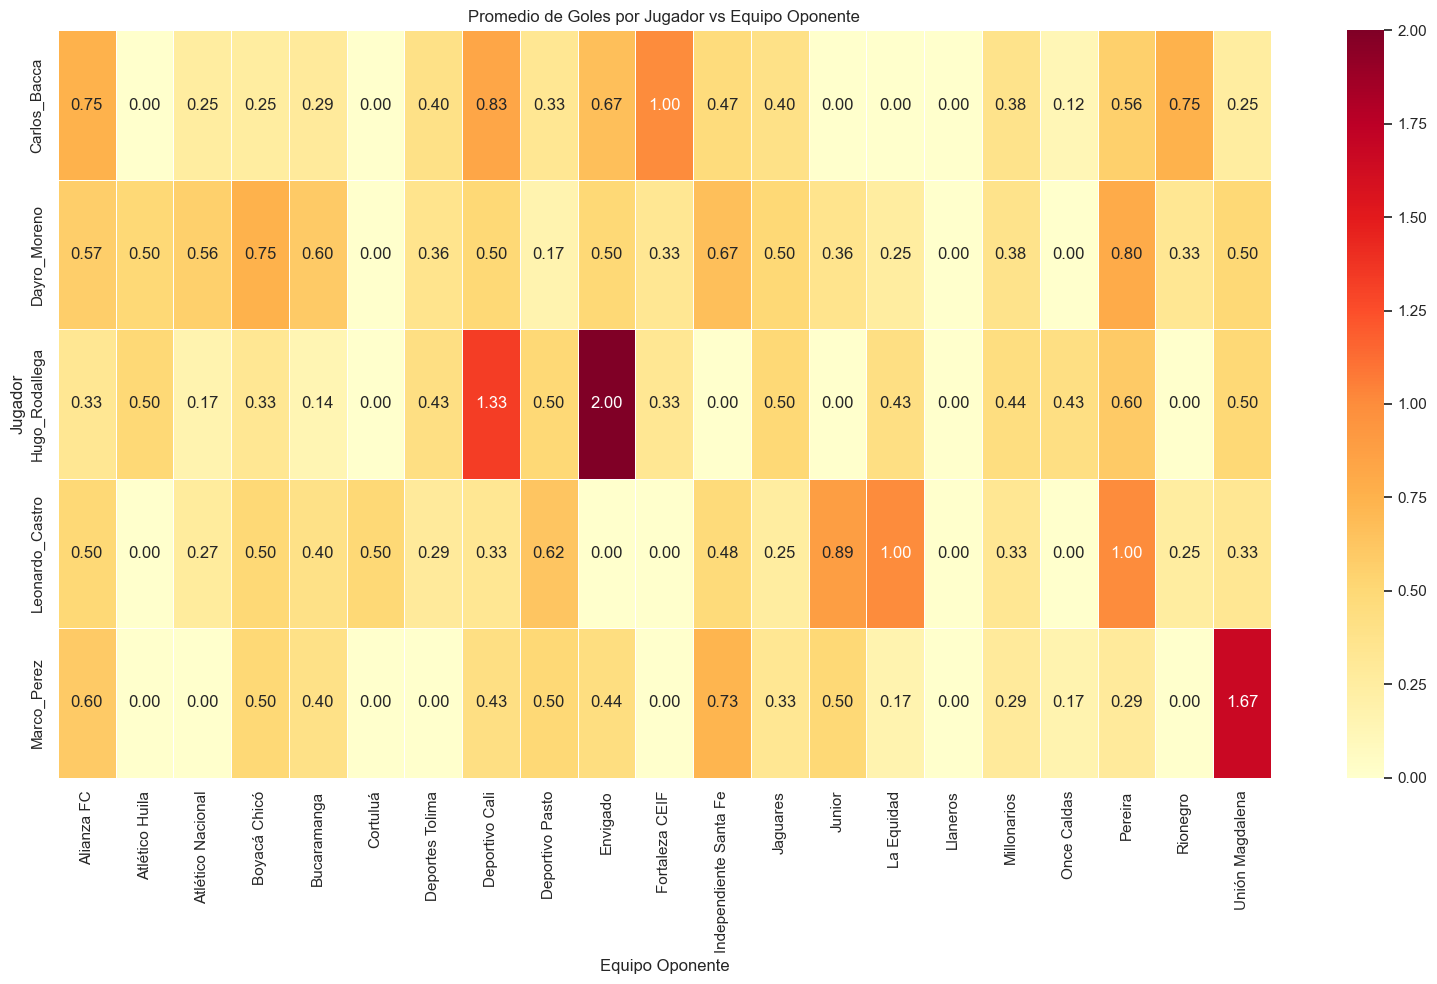

<Figure size 1200x800 with 0 Axes>

In [8]:
# Agrupar por jugador y oponente para ver el promedio de goles
goles_vs_oponentes = df.groupby(['Jugador', 'Oponente_Estandarizado'])['Goles'].mean().reset_index()

# Transformar a formato matricial para visualización
matriz_goles = goles_vs_oponentes.pivot_table(
    index='Jugador', 
    columns='Oponente_Estandarizado', 
    values='Goles',
    fill_value=0
)

# Filtrar para mostrar solo los principales goleadores y equipos colombianos
# (ajusta el número según necesites)
top_jugadores = df.groupby('Jugador')['Goles'].sum().sort_values(ascending=False).head(15).index
equipos_colombianos = [col for col in df.columns if col.startswith('Oponente_') and 
                      col not in ['Oponente_Estandarizado', 'Oponente_Es_Colombiano']]
equipos_colombianos = [col.replace('Oponente_', '') for col in equipos_colombianos]

# Filtrar la matriz
matriz_filtrada = matriz_goles.loc[matriz_goles.index.isin(top_jugadores), 
                                  [col for col in matriz_goles.columns if col in equipos_colombianos]]

# Visualizar con heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(matriz_filtrada, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=.5)
plt.title('Promedio de Goles por Jugador vs Equipo Oponente')
plt.xlabel('Equipo Oponente')
plt.ylabel('Jugador')
plt.tight_layout()
plt.show()

# Guardar gráfico si es necesario
plt.savefig('correlacion_jugadores_oponentes.png', dpi=300, bbox_inches='tight')

**Preparacion de datos modelo ARIMA**

Cargando datos...
Preparando variables temporales...
Creando variable de rendimiento histórico contra oponentes...
Seleccionando jugadores para análisis...
Top 5 jugadores con más registros:
Jugador
Dayro_Moreno       146
Leonardo_Castro    138
Carlos_Bacca       135
Hugo_Rodallega     122
Marco_Perez        121
Name: count, dtype: int64
Jugadores seleccionados para análisis: ['Dayro_Moreno', 'Leonardo_Castro', 'Carlos_Bacca', 'Hugo_Rodallega', 'Marco_Perez']

Procesando datos para cada jugador seleccionado...

--- Procesando Dayro_Moreno ---
Registros disponibles: 146
Preparación completada. Serie temporal de 146 registros por partido.

--- Procesando Leonardo_Castro ---
Registros disponibles: 138
Preparación completada. Serie temporal de 138 registros por partido.

--- Procesando Carlos_Bacca ---
Registros disponibles: 135
Preparación completada. Serie temporal de 135 registros por partido.

--- Procesando Hugo_Rodallega ---
Registros disponibles: 122
Preparación completada. Serie te

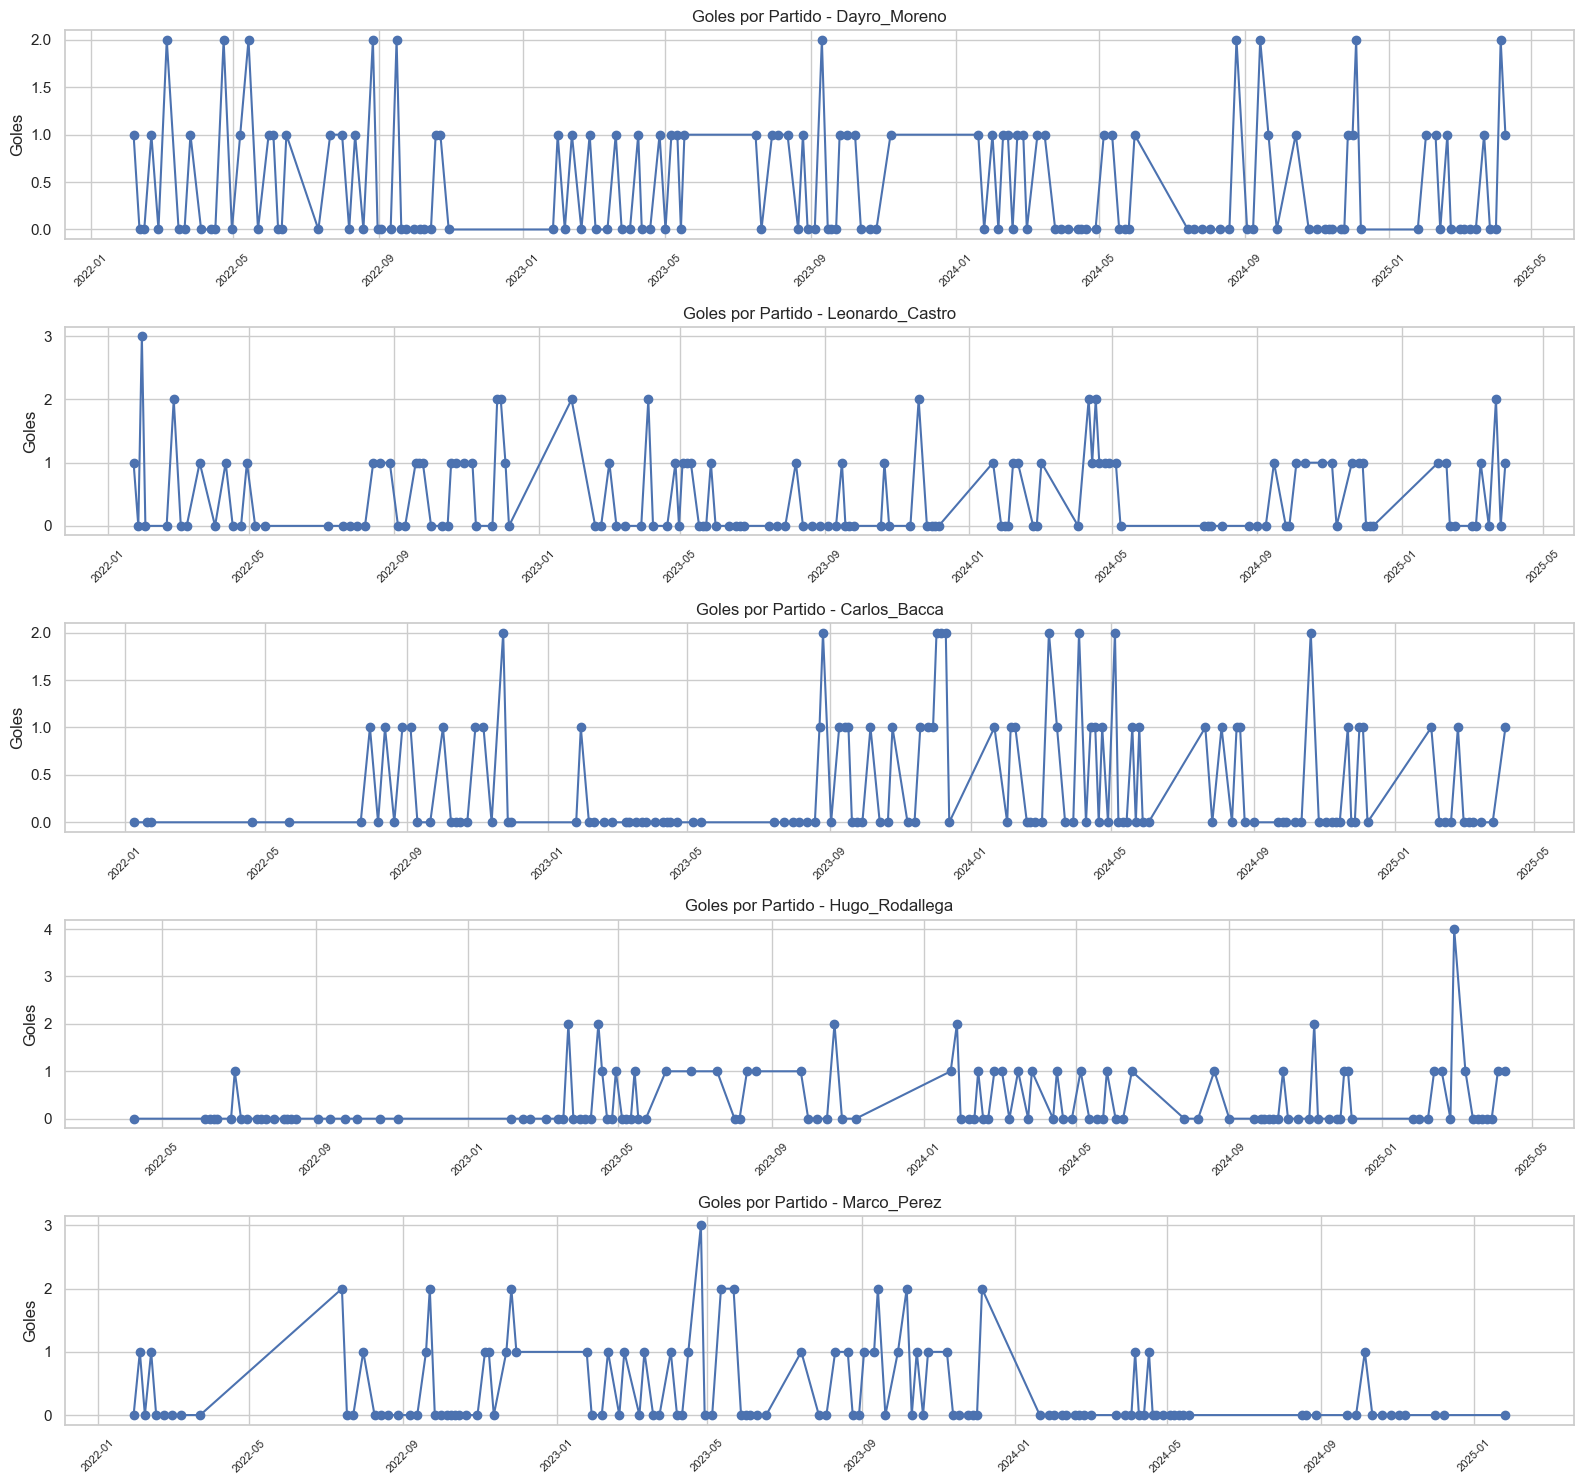

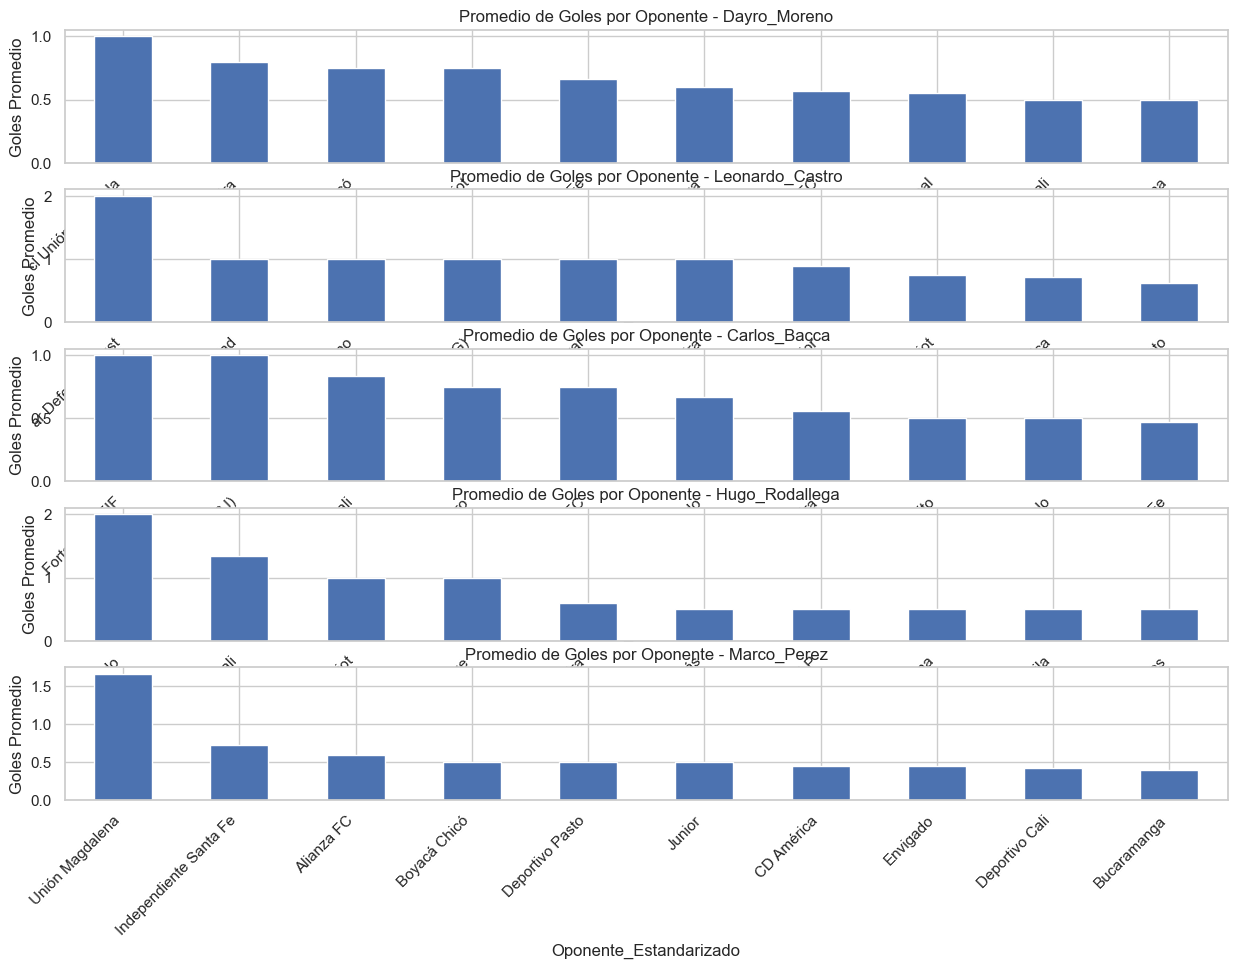


¡Datos preparados con éxito para todos los jugadores a nivel de partido individual!


In [12]:
# 1. Carga de datos
print("Cargando datos...")
df = pd.read_csv("Goleadores_Procesados.csv")

# 2. Preparación de variables temporales
print("Preparando variables temporales...")
# Asegurarse de que la fecha esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
# Ordenar por fecha y jugador
df = df.sort_values(by=['Jugador', 'Fecha'])

# 3. Creación de variable de rendimiento histórico contra oponentes
print("Creando variable de rendimiento histórico contra oponentes...")
# Para cada partido, calcular el promedio histórico de goles ANTES de ese partido
df_con_historico = df.copy()
df_con_historico['Promedio_Historico_vs_Oponente'] = 0.0

# Iterar por jugador y crear historial dinámico (solo datos anteriores)
jugadores_unicos = df['Jugador'].unique()
for jugador in jugadores_unicos:
    df_jugador = df[df['Jugador'] == jugador].copy()
    # Ordenar cronológicamente
    df_jugador = df_jugador.sort_values(by='Fecha')
    
    # Para cada partido
    for idx, partido in df_jugador.iterrows():
        oponente = partido['Oponente_Estandarizado']
        fecha_partido = partido['Fecha']
        
        # Filtrar partidos previos contra el mismo oponente
        partidos_previos = df_jugador[(df_jugador['Fecha'] < fecha_partido) & 
                                     (df_jugador['Oponente_Estandarizado'] == oponente)]
        
        # Calcular promedio de goles en partidos previos o usar 0 si no hay historial
        if len(partidos_previos) > 0:
            promedio_historico = partidos_previos['Goles'].mean()
        else:
            promedio_historico = 0.0
        
        # Guardar el valor en el DataFrame original
        df_con_historico.loc[idx, 'Promedio_Historico_vs_Oponente'] = promedio_historico

# Usar el DataFrame actualizado con historial dinámico
df = df_con_historico

# 4. Selección de jugadores para análisis
print("Seleccionando jugadores para análisis...")
# Mostrar distribución de jugadores
jugadores_count = df['Jugador'].value_counts()
print(f"Top 5 jugadores con más registros:\n{jugadores_count.head()}")

# Seleccionar top jugadores para análisis
num_jugadores = 5
top_jugadores = jugadores_count.head(num_jugadores).index.tolist()
print(f"Jugadores seleccionados para análisis: {top_jugadores}")

# 5. Variables seleccionadas según análisis previo
variables_modelo = [
    'Fecha', 'Goles', 'Tiros a puerta', 'Penales marcados', 
    'Tiros totales', 'Minutos', 'Oponente_Estandarizado', 
    'Sede_Local', 'Sede_Visitante', 'Promedio_Historico_vs_Oponente'
]

# Diccionarios para almacenar dataframes por jugador
df_jugadores = {}
y_series = {}
X_dfs = {}

# 6. Procesamiento para cada jugador seleccionado
print("\nProcesando datos para cada jugador seleccionado...")
for jugador in top_jugadores:
    print(f"\n--- Procesando {jugador} ---")
    
    # Filtrar datos para el jugador
    df_jugador = df[df['Jugador'] == jugador].copy().sort_values(by='Fecha')
    print(f"Registros disponibles: {len(df_jugador)}")
    
    # Verificar variables disponibles
    variables_disponibles = [var for var in variables_modelo if var in df_jugador.columns]
    variables_faltantes = [var for var in variables_modelo if var not in df_jugador.columns]
    
    if variables_faltantes:
        print(f"Advertencia: Variables no disponibles: {variables_faltantes}")
    
    # Crear dataframe con variables seleccionadas
    df_modelo = df_jugador[variables_disponibles].copy()
    
    # Preparación final - usar datos a nivel de partido, no mensual
    df_modelo_final = df_modelo.set_index('Fecha')
    
    # Guardar en diccionarios
    df_jugadores[jugador] = df_jugador
    y_series[jugador] = df_modelo_final['Goles']
    X_dfs[jugador] = df_modelo_final.drop('Goles', axis=1)
    
    print(f"Preparación completada. Serie temporal de {len(df_modelo_final)} registros por partido.")

# 7. Visualización de series temporales para todos los jugadores seleccionados
print("\nVisualizando series temporales de goles para todos los jugadores...")

# Gráficos individuales - goles por partido
plt.figure(figsize=(16, num_jugadores*3))

for i, jugador in enumerate(top_jugadores, 1):
    plt.subplot(num_jugadores, 1, i)
    df_plot = df_jugadores[jugador].sort_values(by='Fecha')
    plt.plot(df_plot['Fecha'], df_plot['Goles'], marker='o', linestyle='-')
    plt.title(f'Goles por Partido - {jugador}')
    plt.ylabel('Goles')
    plt.grid(True)
    plt.tick_params(axis='x', labelsize=8, rotation=45)

plt.tight_layout()
plt.show()

# Gráfico adicional: goles contra diferentes oponentes
plt.figure(figsize=(15, 10))
for i, jugador in enumerate(top_jugadores, 1):
    plt.subplot(num_jugadores, 1, i)
    df_oponentes = df_jugadores[jugador].groupby('Oponente_Estandarizado')['Goles'].mean().sort_values(ascending=False).head(10)
    df_oponentes.plot(kind='bar')
    plt.title(f'Promedio de Goles por Oponente - {jugador}')
    plt.ylabel('Goles Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

print("\n¡Datos preparados con éxito para todos los jugadores a nivel de partido individual!")

**Entrenamiento ARIMA/ARIMAX**

Iniciando entrenamiento de modelos ARIMA/ARIMAX para cada jugador...

=== Entrenamiento para Dayro_Moreno ===
Conjunto de entrenamiento: 116 partidos
Conjunto de prueba: 30 partidos
Entrenando modelo ARIMAX con 6 variables exógenas
Buscando mejores parámetros con auto_arima...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.934, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=266.482, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=268.593, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=259.056, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=241.850, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=219.946, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=221.122, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=219.046, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=220.162, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0]          

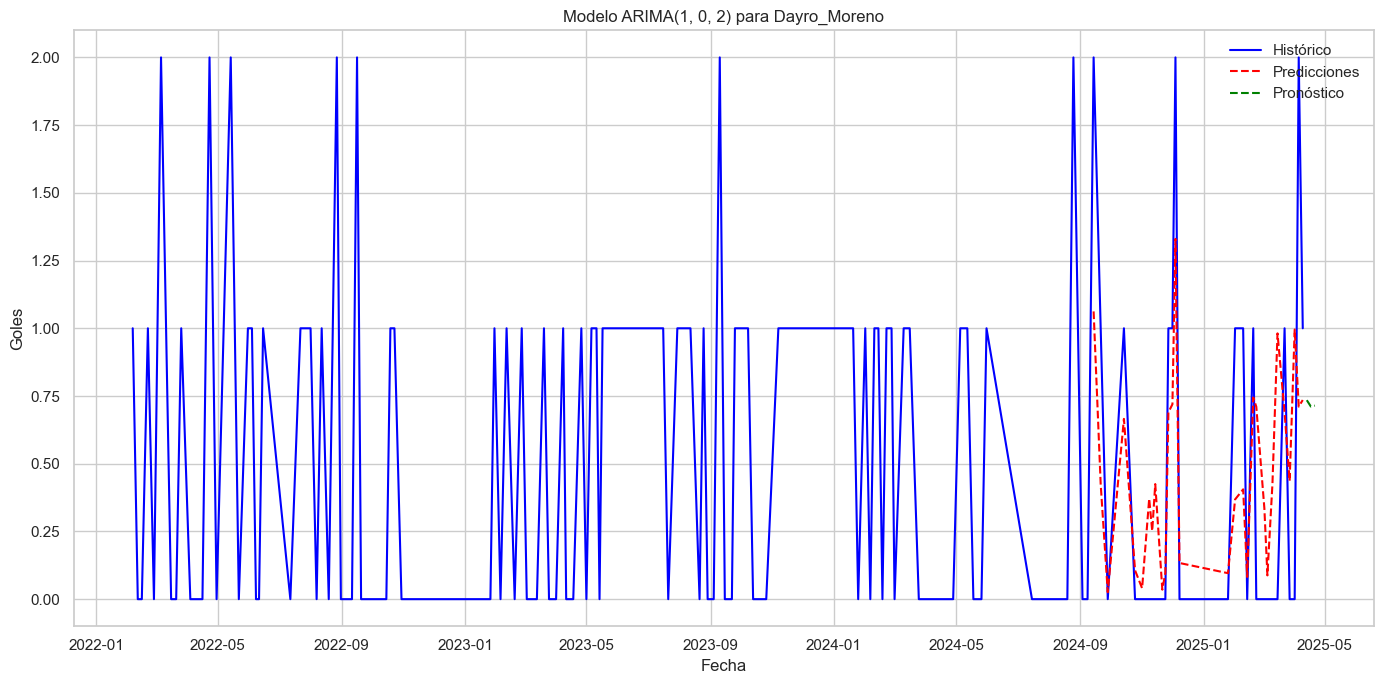


=== Entrenamiento para Leonardo_Castro ===
Conjunto de entrenamiento: 110 partidos
Conjunto de prueba: 28 partidos
Entrenando modelo ARIMAX con 6 variables exógenas
Buscando mejores parámetros con auto_arima...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.561, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=259.159, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=263.187, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=254.005, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=241.883, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=238.432, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=239.088, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=232.083, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=232.750, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : 

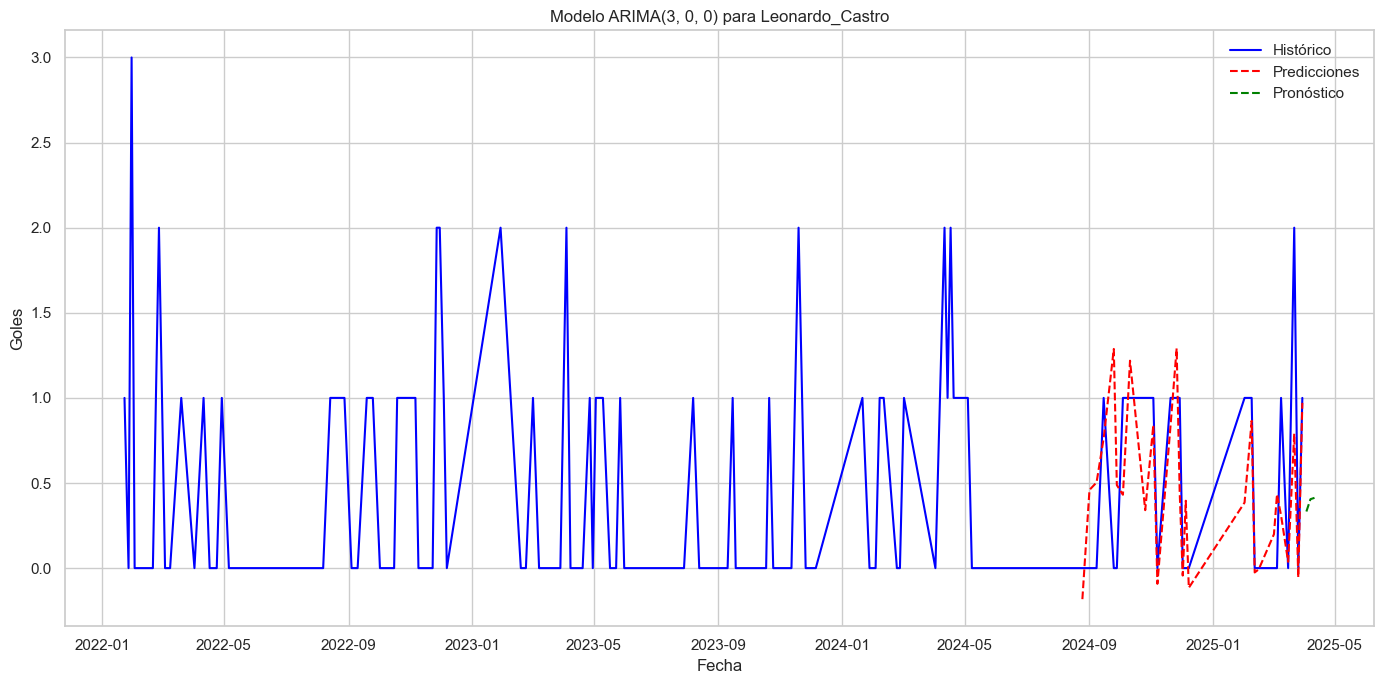


=== Entrenamiento para Carlos_Bacca ===
Conjunto de entrenamiento: 108 partidos
Conjunto de prueba: 27 partidos
Entrenando modelo ARIMAX con 6 variables exógenas
Buscando mejores parámetros con auto_arima...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=248.551, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=234.708, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=241.133, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=223.235, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=219.873, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=214.859, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=213.560, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=211.722, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=213.590, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=234.414, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=215.234, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept

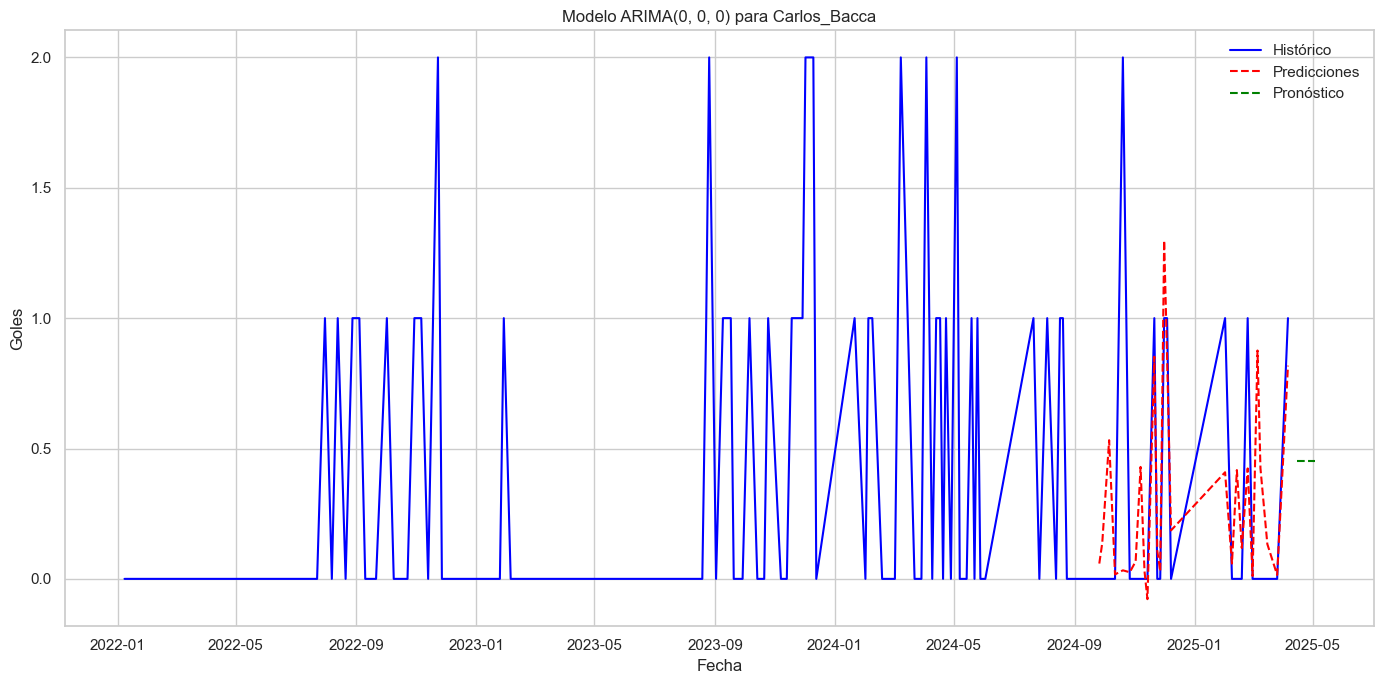


=== Entrenamiento para Hugo_Rodallega ===
Conjunto de entrenamiento: 97 partidos
Conjunto de prueba: 25 partidos
Entrenando modelo ARIMAX con 6 variables exógenas
Buscando mejores parámetros con auto_arima...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=228.061, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=210.152, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=163.514, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=226.061, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=164.701, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=163.407, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=167.227, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=158.463, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=160.321, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=156.494, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=161.559, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0]         

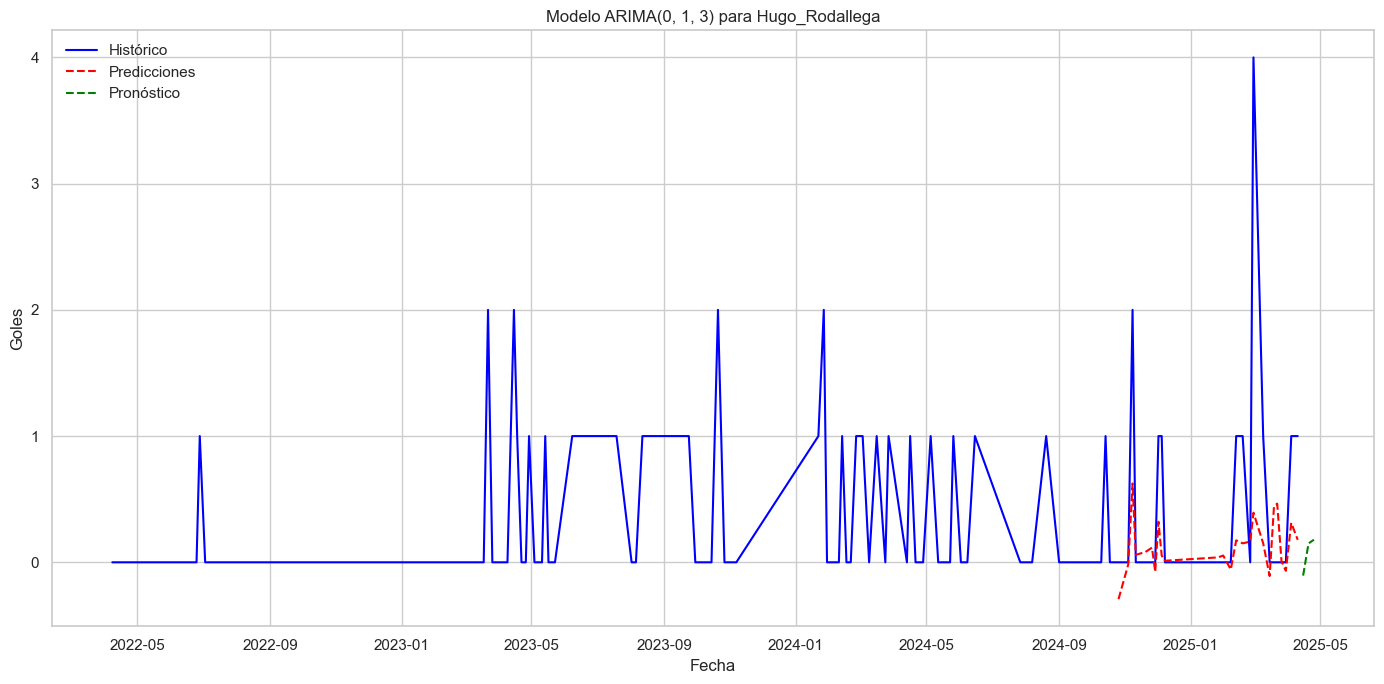


=== Entrenamiento para Marco_Perez ===
Conjunto de entrenamiento: 96 partidos
Conjunto de prueba: 25 partidos
Entrenando modelo ARIMAX con 6 variables exógenas
Buscando mejores parámetros con auto_arima...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=237.000, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=227.250, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=228.972, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=228.019, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=211.643, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=213.397, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=213.289, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=230.620, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.442 seconds
Mejores parámetros: ARIMA(1, 0,

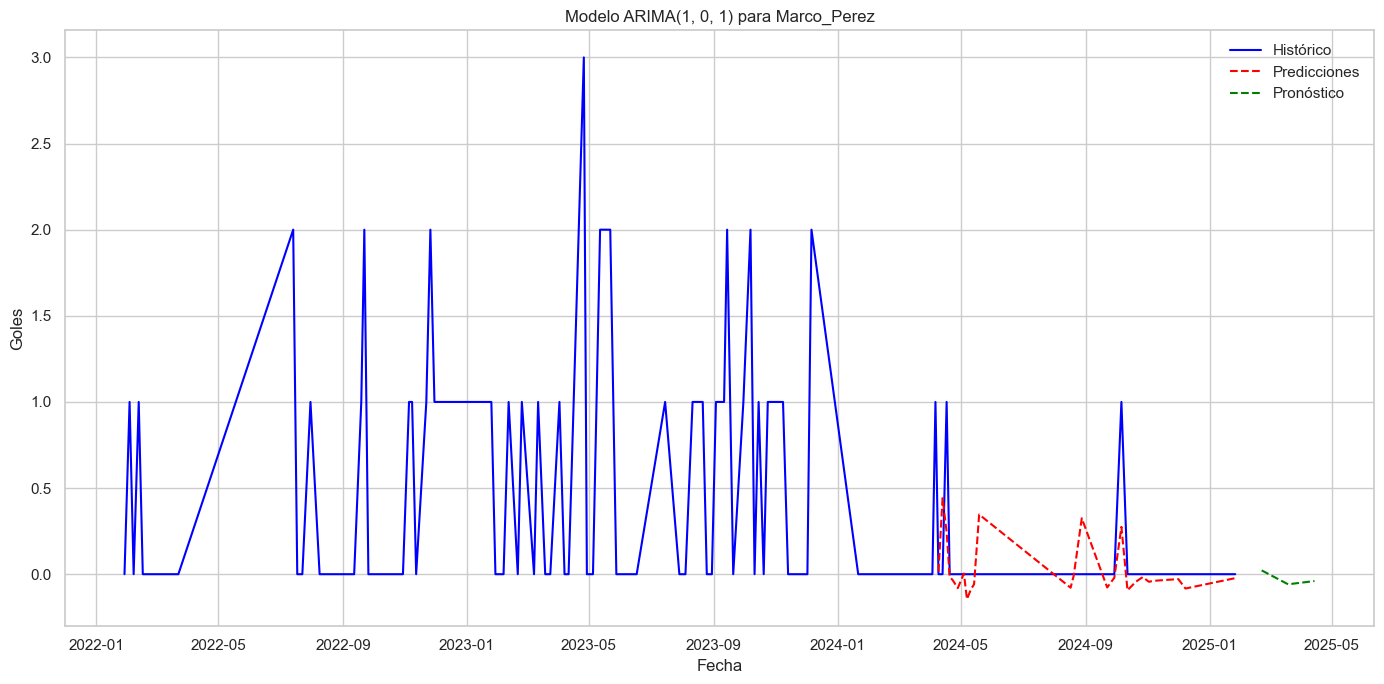


=== Comparación de rendimiento entre jugadores ===
                         Modelo  RMSE  MAE  Acierto (%)
Marco_Perez      ARIMA(1, 0, 1)  0.25 0.14       100.00
Dayro_Moreno     ARIMA(1, 0, 2)  0.52 0.40        96.67
Carlos_Bacca     ARIMA(0, 0, 0)  0.49 0.28        96.30
Leonardo_Castro  ARIMA(3, 0, 0)  0.48 0.35        92.86
Hugo_Rodallega   ARIMA(0, 1, 3)  0.90 0.51        92.00


<Figure size 1200x600 with 0 Axes>

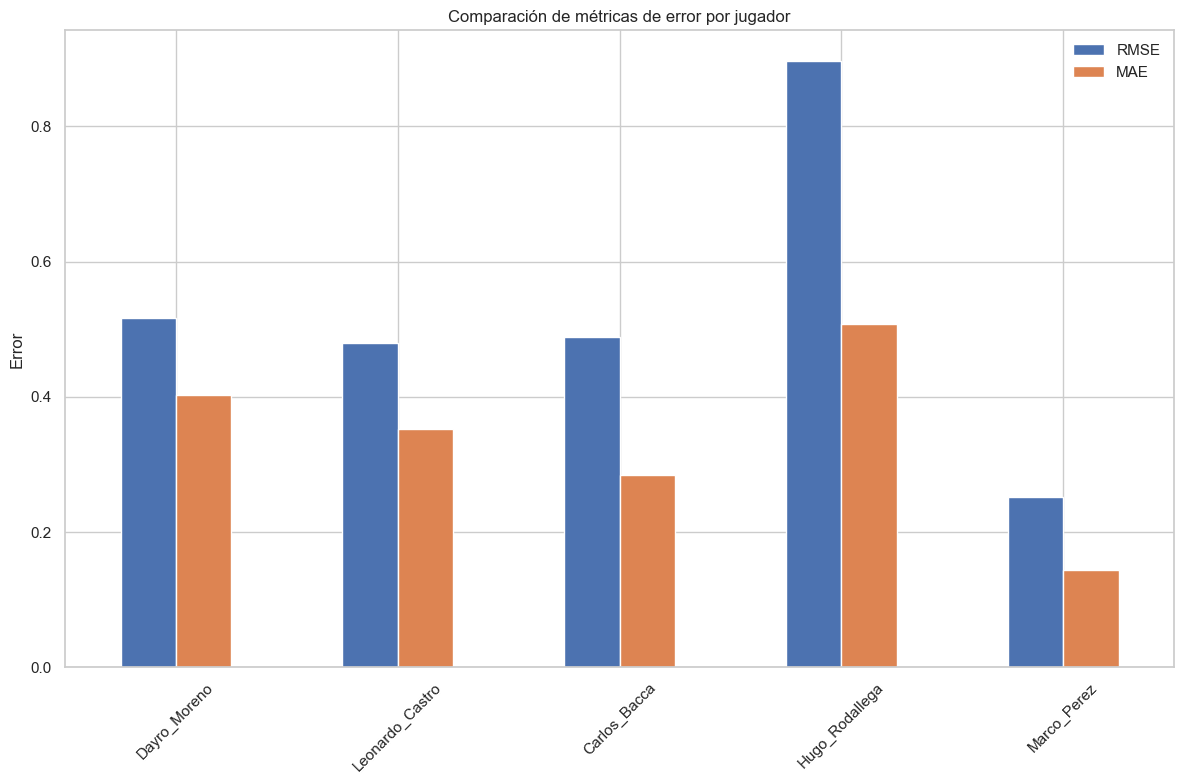

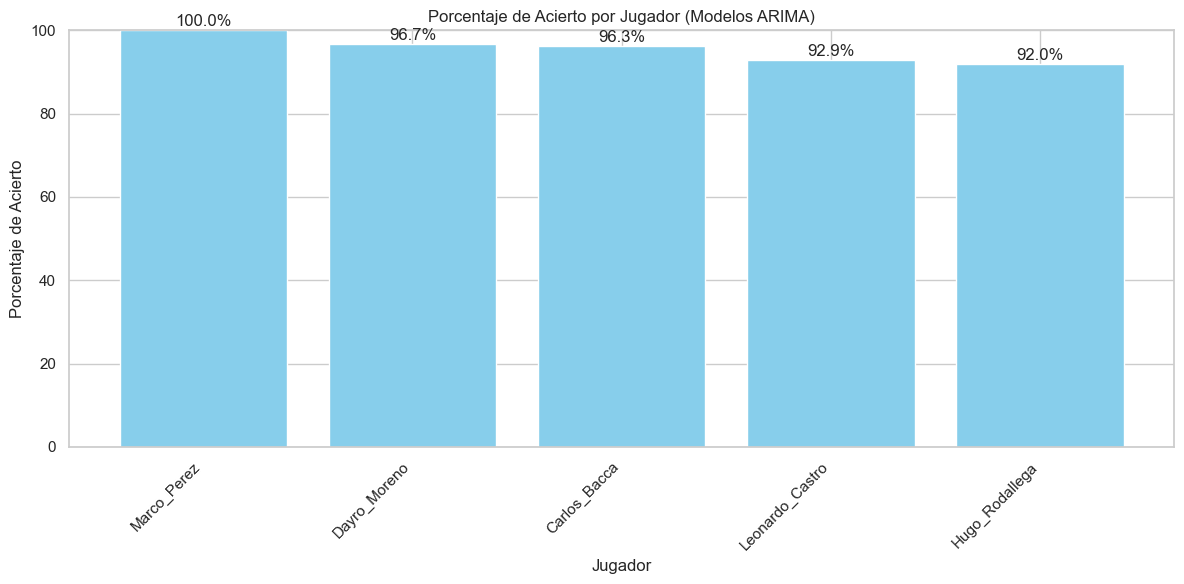


¡Entrenamiento y evaluación de modelos ARIMA completados!
Todos los modelos han sido guardados en la carpeta 'modelos_arima/'


In [13]:
import json
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
import pickle

# Crear directorio para guardar modelos si no existe
if not os.path.exists('modelos_arima'):
    os.makedirs('modelos_arima')

print("Iniciando entrenamiento de modelos ARIMA/ARIMAX para cada jugador...")

# Parámetros para división de datos
test_size = 0.2  # Último 20% de datos para prueba

# Diccionarios para almacenar resultados
modelos = {}
metricas = {}
predicciones = {}
aciertos_porcentaje = {}

# Función para calcular porcentaje de acierto (diferencia menor a 1 gol)
def calcular_porcentaje_acierto(y_true, y_pred):
    aciertos = np.sum(np.abs(y_true - np.array(y_pred)) < 1)
    return (aciertos / len(y_true)) * 100

for jugador in top_jugadores:
    print(f"\n=== Entrenamiento para {jugador} ===")
    
    # Preparar series temporales a nivel de partido (no agregación mensual)
    df_partido = df_jugadores[jugador].sort_values(by='Fecha')
    
    # Establecer fecha como índice para las series temporales
    df_partido = df_partido.set_index('Fecha')
    
    # Seleccionar variable objetivo y predictores
    y = df_partido['Goles']
    
    # Seleccionar predictores (variables exógenas)
    cols_predictores = ['Tiros a puerta', 'Tiros totales', 'Minutos', 
                        'Sede_Local', 'Sede_Visitante', 'Promedio_Historico_vs_Oponente']
    X = df_partido[cols_predictores].select_dtypes(include=['number'])
    
    if len(y) < 12:
        print(f"Insuficientes datos para {jugador}. Se necesitan al menos 12 observaciones.")
        continue
    
    # División en conjuntos de entrenamiento y prueba
    train_size = int(len(y) * (1 - test_size))
    y_train, y_test = y[:train_size], y[train_size:]
    X_train, X_test = X[:train_size], X[train_size:]
    
    print(f"Conjunto de entrenamiento: {y_train.shape[0]} partidos")
    print(f"Conjunto de prueba: {y_test.shape[0]} partidos")
    
    # Verificar si hay suficientes variables exógenas
    if not X.empty:
        print(f"Entrenando modelo ARIMAX con {len(X.columns)} variables exógenas")
        usar_exogenas = True
    else:
        print("Entrenando modelo ARIMA sin variables exógenas")
        usar_exogenas = False
    
    # 1. Auto ARIMA para selección automática de parámetros
    print("Buscando mejores parámetros con auto_arima...")
    try:
        if usar_exogenas:
            # Auto ARIMA con variables exógenas
            modelo_auto = pm.auto_arima(
                y_train,
                exogenous=X_train,
                start_p=0, start_q=0,
                max_p=3, max_q=3, max_d=2,
                seasonal=False,  # Configurar como True si hay estacionalidad
                information_criterion='aic',
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
        else:
            # Auto ARIMA sin variables exógenas
            modelo_auto = pm.auto_arima(
                y_train,
                start_p=0, start_q=0,
                max_p=3, max_q=3, max_d=2,
                seasonal=False,
                information_criterion='aic',
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
        
        # Obtener los mejores parámetros
        orden = modelo_auto.order
        print(f"Mejores parámetros: ARIMA{orden}")
        
        # 2. Entrenamiento del modelo final usando los parámetros óptimos
        print("Entrenando modelo final...")
        if usar_exogenas:
            # Modelo SARIMAX con variables exógenas
            modelo = SARIMAX(
                y_train,
                exog=X_train,
                order=orden,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            resultados = modelo.fit(disp=False)
        else:
            # Modelo ARIMA simple
            modelo = ARIMA(y_train, order=orden)
            resultados = modelo.fit()
        
        # 3. Evaluación del modelo
        print("Evaluando modelo...")
        if usar_exogenas:
            # Predicciones en conjunto de prueba
            y_pred = resultados.forecast(steps=len(y_test), exog=X_test)
        else:
            # Predicciones sin exógenas
            y_pred = resultados.forecast(steps=len(y_test))
        
        # Métricas de evaluación
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        porcentaje_acierto = calcular_porcentaje_acierto(y_test, y_pred)
        
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"Porcentaje de acierto: {porcentaje_acierto:.2f}%")
        
        # 4. Predicciones para próximos partidos
        print("Generando predicciones para próximos partidos...")
        
        # Para predicciones futuras, usamos los últimos valores como referencia
        if usar_exogenas:
            # Promedios de las últimas 5 observaciones o todas si hay menos
            n_ultimos = min(5, len(X))
            ultimos_x = X.iloc[-n_ultimos:].mean().values.reshape(1, -1)
            
            # Repetir para los próximos 3 partidos
            x_future = np.tile(ultimos_x, (3, 1))
            
            # Predicción para los próximos 3 partidos
            pred_future = resultados.forecast(steps=3, exog=x_future)
        else:
            # Predicción sin exógenas
            pred_future = resultados.forecast(steps=3)
        
        print(f"Predicción para próximos 3 partidos: {pred_future.values}")
        
        # 5. Guardar resultados y modelo
        modelos[jugador] = resultados
        metricas[jugador] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'Porcentaje_Acierto': porcentaje_acierto
        }
        predicciones[jugador] = {
            'test_pred': y_pred,
            'test_real': y_test,
            'future_pred': pred_future
        }
        
        # Guardar modelo en archivo pickle con toda la información necesaria
        ruta_modelo = f"modelos_arima/arima_{jugador.replace(' ', '_')}.pkl"
        with open(ruta_modelo, 'wb') as file:
            # Crear diccionario con toda la información relevante
            modelo_guardado = {
                'modelo_entrenado': resultados,  # Objeto ya entrenado (con fit aplicado)
                'modelo_config': {  # Configuración del modelo
                    'orden': orden,
                    'usa_exogenas': usar_exogenas,
                    'variables_exogenas': list(X.columns) if usar_exogenas else [],
                    'tipo_modelo': 'SARIMAX' if usar_exogenas else 'ARIMA'
                },
                'datos_entrenamiento': {  # Información sobre los datos de entrenamiento
                    'periodo_inicio': str(y_train.index.min()),
                    'periodo_fin': str(y_train.index.max()),
                    'num_observaciones': len(y_train)
                },
                'metricas': {  # Resultados de evaluación
                    'RMSE': rmse,
                    'MAE': mae,
                    'Acierto': porcentaje_acierto,
                    'MSE': mse
                }           
            }
            
            # Verificación adicional antes de guardar
            if not hasattr(resultados, 'predict'):
                print(f"¡Advertencia! El modelo para {jugador} no tiene método predict")
            
            pickle.dump(modelo_guardado, file, protocol=pickle.HIGHEST_PROTOCOL)

        print(f"Modelo guardado correctamente en: {ruta_modelo}")
        print(f"  - Tipo: {'ARIMAX' if usar_exogenas else 'ARIMA'}{orden}")
        print(f"  - Métricas: RMSE={rmse:.2f}, MAE={mae:.2f}, Acierto={porcentaje_acierto:.1f}%")
        
        # Guardar porcentaje de acierto para comparación final
        aciertos_porcentaje[jugador] = {
            'Modelo': f"ARIMA{orden}",
            'RMSE': rmse,
            'MAE': mae,
            'Acierto (%)': porcentaje_acierto
        }
        
        # 6. Visualización de resultados
        plt.figure(figsize=(14, 7))
        
        # Datos históricos completos
        plt.plot(y.index, y.values, label='Histórico', color='blue')
        
        # Predicciones en conjunto de prueba
        plt.plot(y_test.index, y_pred, label='Predicciones', color='red', linestyle='--')
        
        # Predicciones futuras (próximos 3 partidos)
        # Asumimos misma frecuencia que los últimos partidos para proyectar fechas futuras
        intervalos = []
        for i in range(1, min(4, len(y))):
            intervalos.append((y.index[-i] - y.index[-(i+1)]).days)
        intervalo_promedio = max(int(np.mean(intervalos)), 3)  # Al menos 3 días
        
        future_dates = [y.index[-1] + timedelta(days=intervalo_promedio * (i+1)) for i in range(3)]
        plt.plot(future_dates, pred_future, label='Pronóstico', color='green', linestyle='--')
        
        plt.title(f'Modelo ARIMA{orden} para {jugador}')
        plt.xlabel('Fecha')
        plt.ylabel('Goles')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error al entrenar modelo para {jugador}: {str(e)}")

# Comparación de rendimiento entre jugadores
if metricas:
    print("\n=== Comparación de rendimiento entre jugadores ===")
    
    # Crear DataFrame para comparación
    df_comparacion = pd.DataFrame.from_dict(aciertos_porcentaje, orient='index')
    df_comparacion = df_comparacion.sort_values('Acierto (%)', ascending=False)
    
    print(df_comparacion)
    
    # Visualización de métricas de error
    plt.figure(figsize=(12, 6))
    error_data = pd.DataFrame({
        'RMSE': [metricas[jugador]['RMSE'] for jugador in metricas],
        'MAE': [metricas[jugador]['MAE'] for jugador in metricas]
    }, index=metricas.keys())
    error_data.plot(kind='bar')
    plt.title('Comparación de métricas de error por jugador')
    plt.ylabel('Error')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Visualización del porcentaje de acierto
    plt.figure(figsize=(12, 6))
    plt.bar(df_comparacion.index, df_comparacion['Acierto (%)'], color='skyblue')
    plt.title('Porcentaje de Acierto por Jugador (Modelos ARIMA)')
    plt.xlabel('Jugador')
    plt.ylabel('Porcentaje de Acierto')
    plt.ylim(0, 100)
    for i, v in enumerate(df_comparacion['Acierto (%)']):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n¡Entrenamiento y evaluación de modelos ARIMA completados!")
print(f"Todos los modelos han sido guardados en la carpeta 'modelos_arima/'")

**Predecir goles**

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Función para cargar un modelo guardado previamente
def cargar_modelo(ruta_modelo):
    with open(ruta_modelo, 'rb') as file:
        modelo_guardado = pickle.load(file)
    return modelo_guardado

# Función para estandarizar nombres de equipos
def estandarizar_nombre_equipo(nombre):
    # Mapeo de nombres de equipos en el calendario a nombres estandarizados
    mapeo_equipos = {
        'Atlético Junior': 'Junior',
        'Junior': 'Junior',
        'Atlético Nacional': 'Nacional',
        'Nacional': 'Nacional',
        'Deportivo Pereira': 'Pereira',
        'Pereira': 'Pereira',
        'Atlético Bucaramanga': 'Bucaramanga',
        'Bucaramanga': 'Bucaramanga',
        'Santa Fe': 'Santa Fe',
        'Independiente Santa Fe': 'Santa Fe',
        'Cali': 'Deportivo Cali',
        'Deportivo Cali': 'Deportivo Cali',
        'América de Cali': 'América',
        'América': 'América',
        'Millonarios': 'Millonarios',
        'Once Caldas': 'Once Caldas',
        'Águilas Doradas': 'Águilas Doradas',
        'La Equidad': 'La Equidad',
        'Envigado': 'Envigado',
        'Fortaleza': 'Fortaleza CEIF',
        'Unión Magdalena': 'Unión Magdalena',
        'Pasto': 'Deportivo Pasto',
        'Deportivo Pasto': 'Deportivo Pasto',
        'Tolima': 'Deportes Tolima',
        'Deportes Tolima': 'Deportes Tolima',
        'Alianza': 'Alianza FC',
        'Medellín': 'Medellín',
        'Chicó': 'Boyacá Chicó',
        'Boyacá Chicó': 'Boyacá Chicó',
        'Llaneros': 'Llaneros'
    }
    
    # Si el nombre está en el mapeo, devuelve la versión estandarizada
    if nombre in mapeo_equipos:
        return mapeo_equipos[nombre]
    return nombre

# Función para estandarizar nombres de jugadores
def estandarizar_nombre_jugador(nombre):
    # Mapeo del nombre con guión bajo al nombre normal
    mapeo_jugadores = {
        'Carlos_Bacca': 'Carlos Bacca',
        'Dayro_Moreno': 'Dayro Moreno',
        'Hugo_Rodallega': 'Hugo Rodallega',
        'Leonardo_Castro': 'Leonardo Castro',
        'Marco_Perez': 'Marco Pérez'
    }
    
    if nombre in mapeo_jugadores:
        return mapeo_jugadores[nombre]
    return nombre

# Función para estandarizar nombres de jugadores en formato inverso
def estandarizar_nombre_jugador_inverso(nombre):
    # Mapeo del nombre normal al nombre con guión bajo
    mapeo_jugadores = {
        'Carlos Bacca': 'Carlos_Bacca',
        'Dayro Moreno': 'Dayro_Moreno',
        'Hugo Rodallega': 'Hugo_Rodallega',
        'Leonardo Castro': 'Leonardo_Castro',
        'Marco Pérez': 'Marco_Perez'
    }
    
    if nombre in mapeo_jugadores:
        return mapeo_jugadores[nombre]
    return nombre

# Función para obtener valores promedio de variables exógenas para un jugador
def obtener_valores_exogenas(datos_historicos, jugador, oponente_estandarizado, es_local):
    # Filtrar por jugador (usando formato de nombre con guión bajo)
    jugador_guion = estandarizar_nombre_jugador_inverso(jugador)
    df_jugador = datos_historicos[datos_historicos['Jugador'] == jugador_guion].copy()
    
    if len(df_jugador) == 0:
        # Valores predeterminados si no hay datos para el jugador
        return {
            'Tiros a puerta': 1.5,
            'Tiros totales': 2.5,
            'Minutos': 80.0,
            'Sede_Local': 1 if es_local else 0,
            'Sede_Visitante': 0 if es_local else 1,
            'Promedio_Historico_vs_Oponente': 0.3
        }
    
    # 1. Obtener valores basados en el oponente específico
    df_vs_oponente = df_jugador[df_jugador['Oponente_Estandarizado'] == oponente_estandarizado]
    
    if len(df_vs_oponente) > 0:
        # Hay datos históricos contra este oponente
        tiros_puerta = df_vs_oponente['Tiros a puerta'].mean()
        tiros_totales = df_vs_oponente['Tiros totales'].mean()
        minutos = df_vs_oponente['Minutos'].mean()
        promedio_goles = df_vs_oponente['Goles'].mean()
    else:
        # No hay datos contra este oponente, usar promedio general
        tiros_puerta = df_jugador['Tiros a puerta'].mean()
        tiros_totales = df_jugador['Tiros totales'].mean()
        minutos = df_jugador['Minutos'].mean()
        promedio_goles = df_jugador['Goles'].mean()
    
    # 2. Ajustar según si es local o visitante
    if es_local:
        df_condicion = df_jugador[df_jugador['Sede_Local'] == 1]
    else:
        df_condicion = df_jugador[df_jugador['Sede_Visitante'] == 1]
    
    if len(df_condicion) > 0:
        # Combinar valores específicos por condición con promedios generales
        # Darle más peso a los valores específicos por condición
        tiros_puerta = (tiros_puerta + df_condicion['Tiros a puerta'].mean()) / 2
        tiros_totales = (tiros_totales + df_condicion['Tiros totales'].mean()) / 2
        minutos = (minutos + df_condicion['Minutos'].mean()) / 2
    
    # 3. Manejar valores NaN
    if pd.isna(tiros_puerta):
        tiros_puerta = 1.5
    if pd.isna(tiros_totales):
        tiros_totales = 2.5
    if pd.isna(minutos):
        minutos = 80.0
    if pd.isna(promedio_goles):
        promedio_goles = 0.3
    
    # 4. Crear diccionario de exógenas
    exogenas = {
        'Tiros a puerta': tiros_puerta,
        'Tiros totales': tiros_totales,
        'Minutos': minutos,
        'Sede_Local': 1 if es_local else 0,
        'Sede_Visitante': 0 if es_local else 1,
        'Promedio_Historico_vs_Oponente': promedio_goles
    }
    
    return exogenas

# Función para extraer coeficientes del modelo ARIMA
def extraer_coeficientes_modelo(modelo_entrenado):
    try:
        # Intentar obtener coeficientes para variables exógenas
        coefs = {}
        
        # Si el modelo tiene parámetros
        if hasattr(modelo_entrenado, 'params'):
            params = modelo_entrenado.params
            
            # Extraer coeficientes de regresión (beta)
            beta_indices = [i for i, name in enumerate(params.index) if name.startswith('beta')]
            if beta_indices:
                for i, idx in enumerate(beta_indices):
                    param_name = params.index[idx]
                    coefs[f'beta{i}'] = params[idx]
            
            # Extraer constante (intercepto)
            const_indices = [i for i, name in enumerate(params.index) if name.startswith('const')]
            if const_indices:
                coefs['const'] = params[const_indices[0]]
            else:
                coefs['const'] = 0.0
        
        return coefs
    except Exception as e:
        print(f"  Error al extraer coeficientes: {str(e)}")
        return {'const': 0.0}

# Función para predecir usando los coeficientes extraídos
def predecir_con_coeficientes(exogenas, variables_requeridas, coeficientes):
    # Si no hay coeficientes, usar el promedio histórico
    if not coeficientes or len(coeficientes) <= 1:
        return exogenas['Promedio_Historico_vs_Oponente']
    
    # Comenzar con la constante
    prediccion = coeficientes.get('const', 0.0)
    
    # Sumar contribuciones de cada variable exógena
    for i, var in enumerate(variables_requeridas):
        if f'beta{i}' in coeficientes and var in exogenas:
            prediccion += coeficientes[f'beta{i}'] * exogenas[var]
    
    # Asegurar que la predicción no sea negativa
    prediccion = max(0, prediccion)
    
    return prediccion

# Función para predecir goles usando una combinación de promedios históricos y tendencias
def predecir_goles_hibrido(exogenas, oponente, jugador, es_local):
    # Base: promedio histórico vs oponente
    base = exogenas['Promedio_Historico_vs_Oponente']
    
    # Factores de ajuste
    factor_local = 1.2 if es_local else 0.8  # Ajuste por localía
    
    # Ajuste por tiros a puerta (indicador de oportunidades de gol)
    factor_tiros = min(1.5, max(0.5, exogenas['Tiros a puerta'] / 2.0))
    
    # Ajuste por minutos jugados (más minutos = más oportunidades)
    factor_minutos = min(1.3, max(0.7, exogenas['Minutos'] / 90.0))
    
    # Predicción hibrida
    prediccion = base * factor_local * factor_tiros * factor_minutos
    
    # Asegurar resultado no negativo
    prediccion = max(0, prediccion)
    
    # Controlar valores extremos
    prediccion = min(3.0, prediccion)  # Máximo razonable para un promedio de goles
    
    return prediccion

# Función principal para hacer predicciones con el calendario 2025
def predecir_goles_calendario_2025(ruta_calendario, carpeta_modelos, ruta_datos_historicos):
    # Cargar datos históricos
    print("Cargando datos históricos...")
    datos_historicos = pd.read_csv(ruta_datos_historicos)
    
    # Convertir fechas a formato datetime
    datos_historicos['Fecha'] = pd.to_datetime(datos_historicos['Fecha'], errors='coerce')
    
    # Cargar el calendario
    print("Cargando calendario 2025...")
    calendario = pd.read_csv(ruta_calendario)
    
    # Convertir la fecha a formato datetime
    calendario['Fecha'] = pd.to_datetime(calendario['Fecha'])
    
    # Estandarizar nombres de equipos y jugadores
    calendario['Equipo_Local_Estandarizado'] = calendario['Equipo_Local'].apply(estandarizar_nombre_equipo)
    calendario['Equipo_Visitante_Estandarizado'] = calendario['Equipo_Visitante'].apply(estandarizar_nombre_equipo)
    calendario['Jugador_Estandarizado'] = calendario['Jugador'].apply(estandarizar_nombre_jugador)
    
    # Equipos de los jugadores
    equipos_jugadores = {
        'Carlos Bacca': 'Junior',
        'Dayro Moreno': 'Once Caldas',
        'Hugo Rodallega': 'Santa Fe',
        'Leonardo Castro': 'Millonarios',
        'Marco Pérez': 'Junior'
    }
    
    # Agregar columna con el equipo del jugador
    calendario['Equipo_Jugador'] = calendario['Jugador_Estandarizado'].map(equipos_jugadores)
    
    # Determinar si el jugador juega como local o visitante
    calendario['Es_Local'] = calendario.apply(
        lambda row: row['Equipo_Local_Estandarizado'] == row['Equipo_Jugador'], 
        axis=1
    )
    
    # Identificar el equipo oponente
    calendario['Oponente'] = calendario.apply(
        lambda row: row['Equipo_Visitante_Estandarizado'] if row['Es_Local'] else row['Equipo_Local_Estandarizado'], 
        axis=1
    )
    
    # Preparar el dataframe para almacenar las predicciones
    predicciones = calendario[['Fecha_Numero', 'Fecha', 'Jugador_Estandarizado', 'Equipo_Local_Estandarizado', 
                               'Equipo_Visitante_Estandarizado', 'Es_Local', 'Oponente']].copy()
    predicciones['Prediccion_Goles'] = 0.0
    
    print("\nRealizando predicciones para cada jugador...")
    
    # Para cada jugador único en el calendario
    jugadores_unicos = calendario['Jugador_Estandarizado'].unique()
    
    for jugador in jugadores_unicos:
        print(f"\nProcesando predicciones para {jugador}...")
        
        # Nombre del archivo del modelo (reemplazar espacios con guión bajo)
        nombre_archivo = f"arima_{jugador.replace(' ', '_')}.pkl"
        ruta_modelo = os.path.join(carpeta_modelos, nombre_archivo)
        
        # Verificar si existe el modelo para este jugador
        if not os.path.exists(ruta_modelo):
            print(f"  No se encontró modelo para {jugador}, usando método híbrido...")
            
            # Filtrar el calendario para este jugador
            partidos_jugador = calendario[calendario['Jugador_Estandarizado'] == jugador]
            
            # Para cada partido de este jugador, usar método híbrido
            for idx, partido in partidos_jugador.iterrows():
                oponente = partido['Oponente']
                es_local = partido['Es_Local']
                
                # Obtener valores de exógenas
                exogenas = obtener_valores_exogenas(datos_historicos, jugador, oponente, es_local)
                
                # Usar método híbrido para predecir
                prediccion = predecir_goles_hibrido(exogenas, oponente, jugador, es_local)
                
                # Guardar predicción
                predicciones.loc[idx, 'Prediccion_Goles'] = prediccion
            
            print(f"  Predicciones completadas para {len(partidos_jugador)} partidos")
            continue
        
        # Cargar el modelo
        try:
            modelo_guardado = cargar_modelo(ruta_modelo)
            print(f"  Modelo cargado correctamente: {nombre_archivo}")
            
            # Obtener configuración del modelo
            config = modelo_guardado['modelo_config']
            modelo_entrenado = modelo_guardado['modelo_entrenado']
            usa_exogenas = config['usa_exogenas']
            variables_exogenas = config.get('variables_exogenas', [])
            
            print(f"  Modelo usa exógenas: {usa_exogenas}")
            if usa_exogenas:
                print(f"  Variables exógenas: {variables_exogenas}")
            
            # Extraer coeficientes del modelo
            coeficientes = extraer_coeficientes_modelo(modelo_entrenado)
            print(f"  Coeficientes extraídos: {coeficientes}")
            
            # Filtrar el calendario para este jugador
            partidos_jugador = calendario[calendario['Jugador_Estandarizado'] == jugador]
            
            # Para cada partido del jugador, hacer una predicción
            for idx, partido in partidos_jugador.iterrows():
                oponente = partido['Oponente']
                es_local = partido['Es_Local']
                
                # Obtener valores de variables exógenas
                exogenas = obtener_valores_exogenas(datos_historicos, jugador, oponente, es_local)
                
                if usa_exogenas and len(coeficientes) > 1:
                    # Usar coeficientes extraídos del modelo para predecir
                    try:
                        prediccion = predecir_con_coeficientes(exogenas, variables_exogenas, coeficientes)
                        print(f"  Predicción con coeficientes: {prediccion:.2f} para {jugador} vs {oponente}")
                    except Exception as e:
                        print(f"  Error al predecir con coeficientes: {str(e)}")
                        prediccion = predecir_goles_hibrido(exogenas, oponente, jugador, es_local)
                        print(f"  Usando método híbrido como alternativa: {prediccion:.2f}")
                else:
                    # Usar método híbrido si no hay suficientes coeficientes
                    prediccion = predecir_goles_hibrido(exogenas, oponente, jugador, es_local)
                    print(f"  Usando método híbrido: {prediccion:.2f} para {jugador} vs {oponente}")
                
                # Almacenar la predicción
                predicciones.loc[idx, 'Prediccion_Goles'] = prediccion
            
            print(f"  Predicciones completadas para {len(partidos_jugador)} partidos")
            
        except Exception as e:
            print(f"  Error general al procesar modelo: {str(e)}")
            
            # En caso de error, usar método híbrido para todos los partidos de este jugador
            partidos_jugador = calendario[calendario['Jugador_Estandarizado'] == jugador]
            for idx, partido in partidos_jugador.iterrows():
                oponente = partido['Oponente']
                es_local = partido['Es_Local']
                exogenas = obtener_valores_exogenas(datos_historicos, jugador, oponente, es_local)
                prediccion = predecir_goles_hibrido(exogenas, oponente, jugador, es_local)
                predicciones.loc[idx, 'Prediccion_Goles'] = prediccion
            
            print(f"  Usando método híbrido para {len(partidos_jugador)} partidos debido a error")
    
    # Ordenar por fecha y jugador
    predicciones = predicciones.sort_values(by=['Fecha', 'Jugador_Estandarizado'])
    
    # Redondear las predicciones a 2 decimales
    predicciones['Prediccion_Goles'] = predicciones['Prediccion_Goles'].round(2)
    
    # Crear versión simplificada para el CSV final
    predicciones_final = predicciones[[
        'Fecha_Numero', 'Fecha', 'Jugador_Estandarizado', 
        'Equipo_Local_Estandarizado', 'Equipo_Visitante_Estandarizado', 
        'Es_Local', 'Prediccion_Goles'
    ]].copy()
    
    # Renombrar columnas para mejor legibilidad
    predicciones_final = predicciones_final.rename(columns={
        'Jugador_Estandarizado': 'Jugador',
        'Equipo_Local_Estandarizado': 'Equipo_Local',
        'Equipo_Visitante_Estandarizado': 'Equipo_Visitante',
        'Es_Local': 'Juega_Local',
        'Prediccion_Goles': 'Goles_Predichos'
    })
    
    # Guardar las predicciones en un archivo CSV
    ruta_salida = "predicciones_calendario_2025.csv"
    predicciones_final.to_csv(ruta_salida, index=False)
    
    print(f"\nPredicciones completadas y guardadas en {ruta_salida}")
    
    return predicciones_final

# Ejecución principal
if __name__ == "__main__":
    # Ruta del calendario y carpeta de modelos
    ruta_calendario = "calendario_2025.csv"
    carpeta_modelos = "modelos_arima"
    ruta_datos_historicos = "Goleadores_Procesados.csv"
    
    # Verificar que existan los archivos necesarios
    if not os.path.exists(ruta_calendario):
        print(f"Error: No se encontró el archivo {ruta_calendario}")
    elif not os.path.exists(carpeta_modelos):
        print(f"Error: No se encontró la carpeta {carpeta_modelos}")
    elif not os.path.exists(ruta_datos_historicos):
        print(f"Error: No se encontró el archivo {ruta_datos_historicos}")
    else:
        # Ejecutar predicciones
        predicciones = predecir_goles_calendario_2025(ruta_calendario, carpeta_modelos, ruta_datos_historicos)
        
        # Mostrar un resumen de las predicciones
        print("\nResumen de predicciones por jugador:")
        resumen = predicciones.groupby('Jugador')['Goles_Predichos'].agg(['mean', 'min', 'max', 'count'])
        print(resumen)
        
        print("\n¡Proceso completado con éxito!")

Cargando datos históricos...
Cargando calendario 2025...

Realizando predicciones para cada jugador...

Procesando predicciones para Carlos Bacca...
  Modelo cargado correctamente: arima_Carlos_Bacca.pkl

== DIAGNÓSTICO DEL MODELO ==
Tipo de modelo: SARIMAX
Orden ARIMA: (0, 0, 0)
Usa variables exógenas: True
Variables exógenas requeridas: ['Tiros a puerta', 'Tiros totales', 'Minutos', 'Sede_Local', 'Sede_Visitante', 'Promedio_Historico_vs_Oponente']

Analizando requisitos de formato para variables exógenas:
nobs: 108
Método disponible: forecast
Método disponible: predict
Método disponible: get_forecast
Método disponible: get_prediction
== FIN DIAGNÓSTICO ==

  Intentando formato 1: <class 'numpy.ndarray'>, forma (1, 6)
  Error formato 1: 0
  Intentando formato 2: <class 'numpy.ndarray'>, forma (6, 1)
  Error formato 2: 0
  Intentando formato 3: <class 'pandas.core.frame.DataFrame'>, forma (1, 6)
  Error formato 3: 0
  No se pudo predecir con ningún formato. Usando promedio histórico.
 

Traceback (most recent call last):
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\indexes\range.py", line 345, in get_loc
    return self._range.index(new_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: 0 is not in range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\USUARIO1\AppData\Local\Temp\ipykernel_19696\1325876041.py", line 351, in predecir_goles_calendario_2025
    prediccion = modelo_entrenado.forecast(steps=1, exog=exog_array)[0]
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1007, in __getitem__
    return self._get_value(key)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1116, in _get_value
    loc = self.index.get_loc(label)
      

  Predicciones completadas para 20 partidos

Procesando predicciones para Dayro Moreno...
  Modelo cargado correctamente: arima_Dayro_Moreno.pkl

== DIAGNÓSTICO DEL MODELO ==
Tipo de modelo: SARIMAX
Orden ARIMA: (1, 0, 2)
Usa variables exógenas: True
Variables exógenas requeridas: ['Tiros a puerta', 'Tiros totales', 'Minutos', 'Sede_Local', 'Sede_Visitante', 'Promedio_Historico_vs_Oponente']

Analizando requisitos de formato para variables exógenas:
nobs: 116
Método disponible: forecast
Método disponible: predict
Método disponible: get_forecast
Método disponible: get_prediction
== FIN DIAGNÓSTICO ==

  Intentando formato 1: <class 'numpy.ndarray'>, forma (1, 6)
  Error formato 1: 0
  Intentando formato 2: <class 'numpy.ndarray'>, forma (6, 1)
  Error formato 2: 0
  Intentando formato 3: <class 'pandas.core.frame.DataFrame'>, forma (1, 6)
  Error formato 3: 0
  No se pudo predecir con ningún formato. Usando promedio histórico.
  Errores encontrados: ['  Error formato 1: 0', '  Error for

Traceback (most recent call last):
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\indexes\range.py", line 345, in get_loc
    return self._range.index(new_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: 0 is not in range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\USUARIO1\AppData\Local\Temp\ipykernel_19696\1325876041.py", line 351, in predecir_goles_calendario_2025
    prediccion = modelo_entrenado.forecast(steps=1, exog=exog_array)[0]
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1007, in __getitem__
    return self._get_value(key)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1116, in _get_value
    loc = self.index.get_loc(label)
      

  Error formato 3: 0
  No se pudo predecir con ningún formato. Usando promedio histórico.
  Errores encontrados: ['  Error formato 1: 0', '  Error formato 2: 0', '  Error formato 3: 0']
  Intentando formato 1: <class 'numpy.ndarray'>, forma (1, 6)
  Error formato 1: 0
  Intentando formato 2: <class 'numpy.ndarray'>, forma (6, 1)
  Error formato 2: 0
  Intentando formato 3: <class 'pandas.core.frame.DataFrame'>, forma (1, 6)
  Error formato 3: 0
  No se pudo predecir con ningún formato. Usando promedio histórico.
  Errores encontrados: ['  Error formato 1: 0', '  Error formato 2: 0', '  Error formato 3: 0']
  Intentando formato 1: <class 'numpy.ndarray'>, forma (1, 6)
  Error formato 1: 0
  Intentando formato 2: <class 'numpy.ndarray'>, forma (6, 1)
  Error formato 2: 0
  Intentando formato 3: <class 'pandas.core.frame.DataFrame'>, forma (1, 6)
  Error formato 3: 0
  No se pudo predecir con ningún formato. Usando promedio histórico.
  Errores encontrados: ['  Error formato 1: 0', '  Err

Traceback (most recent call last):
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\indexes\range.py", line 345, in get_loc
    return self._range.index(new_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: 0 is not in range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\USUARIO1\AppData\Local\Temp\ipykernel_19696\1325876041.py", line 351, in predecir_goles_calendario_2025
    prediccion = modelo_entrenado.forecast(steps=1, exog=exog_array)[0]
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1007, in __getitem__
    return self._get_value(key)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1116, in _get_value
    loc = self.index.get_loc(label)
      

  Intentando formato 2: <class 'numpy.ndarray'>, forma (6, 1)
  Error formato 2: 0
  Intentando formato 3: <class 'pandas.core.frame.DataFrame'>, forma (1, 6)
  Error formato 3: 0
  No se pudo predecir con ningún formato. Usando promedio histórico.
  Errores encontrados: ['  Error formato 1: 0', '  Error formato 2: 0', '  Error formato 3: 0']
  Intentando formato 1: <class 'numpy.ndarray'>, forma (1, 6)
  Error formato 1: 0
  Intentando formato 2: <class 'numpy.ndarray'>, forma (6, 1)
  Error formato 2: 0
  Intentando formato 3: <class 'pandas.core.frame.DataFrame'>, forma (1, 6)
  Error formato 3: 0
  No se pudo predecir con ningún formato. Usando promedio histórico.
  Errores encontrados: ['  Error formato 1: 0', '  Error formato 2: 0', '  Error formato 3: 0']
  Intentando formato 1: <class 'numpy.ndarray'>, forma (1, 6)
  Error formato 1: 0
  Intentando formato 2: <class 'numpy.ndarray'>, forma (6, 1)
  Error formato 2: 0
  Intentando formato 3: <class 'pandas.core.frame.DataFrame'>

Traceback (most recent call last):
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\indexes\range.py", line 345, in get_loc
    return self._range.index(new_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: 0 is not in range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\USUARIO1\AppData\Local\Temp\ipykernel_19696\1325876041.py", line 351, in predecir_goles_calendario_2025
    prediccion = modelo_entrenado.forecast(steps=1, exog=exog_array)[0]
                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1007, in __getitem__
    return self._get_value(key)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO1\Downloads\Proyecto final bi\venv\Lib\site-packages\pandas\core\series.py", line 1116, in _get_value
    loc = self.index.get_loc(label)
      